In [1]:
import numpy as np
from numpy import arange
from numpy.random import rand
import pandas as pd
import numexpr as ne
import matplotlib.pyplot as plt
import pylab as py
import scipy.stats as stats
from scipy.stats import gaussian_kde
import seaborn as sns
from ipykernel import kernelapp as app
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics
from scipy.stats import linregress
%matplotlib inline

### Reading in the datafiles

##### http://localhost:8888/notebooks/Documents/Python/file%20import.ipynb

In [2]:
#food4me = pd.read_csv('\\Users\\Walker\\Documents\\Python\\food4me.csv',index_col=0) ### this is from dataset6_0m now

In [3]:
#food4me.to_pickle('food4mepickled.pickle')

In [4]:
food4me = pd.read_pickle('food4mepickled.pickle')

In [5]:
avgkgCO2_real = pd.read_excel('\\Users\\Walker\\Documents\\Python\\avgkgCO2_real.xlsx')

In [19]:
avgkgCO2_real.head()

,"Porridge, Readybrek","Breakfast Cereals, Wholegrain E.g. Branflakes, Barley Flakes","Breakfast Cereals, Non-Wholegrain E.g. Cornflakes","Breakfast Cereals E.g. Muesli, Cruesli",White Bread,Brown Bread And Seeded Bread,Dark Wholemeal Breads E.g. Rye Or Soda,White Rolls,Brown And Seeded Rolls,"Tortillas, Wraps",...,masterid,id,country,gender,age,BMI,totalPA,home_processing_impacts,total_kgCO2,total_kgCO2_w_avghomeprocessing
0,NaN,NaN,NaN,0.220900,0.002976,0.027829,0.024247,NaN,0.007630,NaN,...,1,H001,0,1,44,24.167162,8.00,0.91,5.309455,5.309455
1,NaN,0.010836,NaN,0.040164,0.028274,0.026308,NaN,0.087783,0.045778,NaN,...,7,H002,0,0,60,27.440599,NaN,0.91,8.478312,8.478312
2,NaN,NaN,NaN,NaN,NaN,0.085228,0.144089,0.006270,0.015259,NaN,...,13,H003,0,1,60,28.305995,NaN,0.91,9.089180,9.089180
3,NaN,0.055605,NaN,0.090368,0.004464,0.004783,0.057691,0.009405,0.045778,NaN,...,19,H004,0,1,26,25.510204,8.75,0.91,5.350193,5.350193
4,0.050749,NaN,NaN,NaN,NaN,0.059790,NaN,NaN,NaN,NaN,...,25,H005,0,1,43,22.052190,7.00,0.91,6.089913,6.089913


In [6]:
avgkgCO2_real['total_kgCO2']=avgkgCO2_real['total_kgCO2_w_avghomeprocessing']

In [7]:
averages = pd.read_excel('\\Users\\Walker\\Documents\\Python\\averages.xlsx')

In [8]:
averages['gender']=food4me['gender'].values

In [9]:
len(averages.gender)

1457

In [10]:
averages.to_excel('averages_check.xlsx')

In [11]:
averages['gender'].isnull().sum()

0

In [12]:
WFP_impacts=pd.read_excel('\\Users\\Walker\\Documents\\Python\\WFP_impacts.xlsx')

LinregressResult(slope=0.0016144446191039699, intercept=3.3671827807082826, rvalue=0.83095011423495979, pvalue=0.0, stderr=2.8337556562764042e-05)


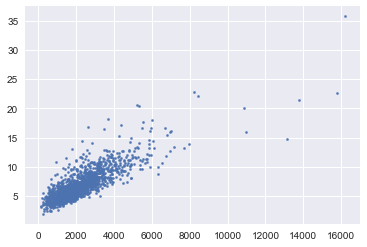

In [13]:
plt.scatter(WFP_impacts['total_WFP'],avgkgCO2_real['total_kgCO2'],s=5)
print (linregress(WFP_impacts['total_WFP'],avgkgCO2_real['total_kgCO2']))


In [14]:
from scipy.stats.stats import pearsonr
#pearsonr(x, y)

In [15]:
MAR = pd.read_excel('\\Users\\Walker\\Documents\\Python\\MAR.xlsx')
MAR_corrected=pd.read_excel('\\Users\\Walker\\Documents\\Python\\MAR_corrected.xlsx')
MAR_corrected_edit=pd.read_excel('\\Users\\Walker\\Documents\\Python\\MAR_corrected_edit.xlsx')
NRF_93=pd.read_excel('\\Users\\Walker\\Documents\\Python\\NRF_93.xlsx')
NRF_93_corrected=pd.read_excel('\\Users\\Walker\\Documents\\Python\\NRF_93_corrected.xlsx')
ED=pd.read_excel('\\Users\\Walker\\Documents\\Python\\ED.xlsx')

In [16]:
country=[0,1,2,3,4,5,6]
for i in country:
    subset=MAR_corrected[MAR_corrected['country']==i]
    x=subset['total_nutrients_corrected'].mean()
    print (x)

0.9504990243902438
0.9131620192307685
0.9723962616822434
0.9724646788990825
0.9373104477611941
0.9571061320754718
0.9577577889447237


In [21]:
NRF_93_corrected['kgCO2']=avgkgCO2_real['total_kgCO2_food']

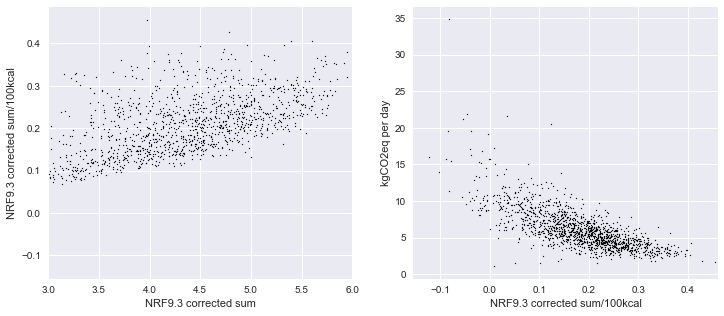

In [22]:
## just a chekc to see relationship between NRF_sum and NRF per 100 kcal
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax[0].scatter(NRF_93_corrected['NRF_sum'],NRF_93_corrected['NRFper100kcal'],color='k',s=1)
ax[0].set_xlim(xmax=6,xmin=3)
ax[1].scatter(NRF_93_corrected['NRFper100kcal'],NRF_93_corrected['kgCO2'],color='k',s=1)
ax[1].set_xlim(xmax=0.46)
ax[0].set_xlabel('NRF9.3 corrected sum');ax[0].set_ylabel('NRF9.3 corrected sum/100kcal')
ax[1].set_xlabel('NRF9.3 corrected sum/100kcal');ax[1].set_ylabel('kgCO2eq per day')

In [23]:
subset_germany=averages.query('country==0')
subset_greece=averages.query('country==1')
subset_ireland=averages.query('country==2')
subset_netherlands=averages.query('country==3')
subset_poland=averages.query('country==4')
subset_spain=averages.query('country==5')
subset_uk=averages.query('country==6')
kgCO2subset_germany=avgkgCO2_real.query('country==0')
kgCO2subset_greece=avgkgCO2_real.query('country==1')
kgCO2subset_ireland=avgkgCO2_real.query('country==2')
kgCO2subset_netherlands=avgkgCO2_real.query('country==3')
kgCO2subset_poland=avgkgCO2_real.query('country==4')
kgCO2subset_spain=avgkgCO2_real.query('country==5')
kgCO2subset_uk=avgkgCO2_real.query('country==6')
germany_subset=MAR_corrected.query('country == 0')
greece_subset=MAR_corrected.query('country==1')
ireland_subset=MAR_corrected.query('country==2')
netherlands_subset=MAR_corrected.query('country==3')
poland_subset=MAR_corrected.query('country==4')
spain_subset=MAR_corrected.query('country==5')
uk_subset=MAR_corrected.query('country==6')

#female subsets per country
a=avgkgCO2_real.query('gender==1&country==0')
b=avgkgCO2_real.query('gender==1&country==1')
c=avgkgCO2_real.query('gender==1&country==2')
d=avgkgCO2_real.query('gender==1&country==3')
e=avgkgCO2_real.query('gender==1&country==4')
f=avgkgCO2_real.query('gender==1&country==5')
g=avgkgCO2_real.query('gender==1&country==6')
#male subsets per country
h=avgkgCO2_real.query('gender==0&country==0')
i=avgkgCO2_real.query('gender==0&country==1')
j=avgkgCO2_real.query('gender==0&country==2')
k=avgkgCO2_real.query('gender==0&country==3')
l=avgkgCO2_real.query('gender==0&country==4')
m=avgkgCO2_real.query('gender==0&country==5')
n=avgkgCO2_real.query('gender==0&country==6')
#females with high PA
o=avgkgCO2_real.query('gender==1&country==0&totalPA>=8.5')
p=avgkgCO2_real.query('gender==1&country==1&totalPA>=8.5')
q=avgkgCO2_real.query('gender==1&country==2&totalPA>=8.5')
r=avgkgCO2_real.query('gender==1&country==3&totalPA>=8.5')
s=avgkgCO2_real.query('gender==1&country==4&totalPA>=8.5')
t=avgkgCO2_real.query('gender==1&country==5&totalPA>=8.5')
u=avgkgCO2_real.query('gender==1&country==6&totalPA>=8.5')
#females with middle PA
o1=avgkgCO2_real.query('gender==1&country==0&totalPA<8.5&totalPA>5.5')
p1=avgkgCO2_real.query('gender==1&country==1&totalPA<8.5&totalPA>5.5')
q1=avgkgCO2_real.query('gender==1&country==2&totalPA<8.5&totalPA>5.5')
r1=avgkgCO2_real.query('gender==1&country==3&totalPA<8.5&totalPA>5.5')
s1=avgkgCO2_real.query('gender==1&country==4&totalPA<8.5&totalPA>5.5')
t1=avgkgCO2_real.query('gender==1&country==5&totalPA<8.5&totalPA>5.5')
u1=avgkgCO2_real.query('gender==1&country==6&totalPA<8.5&totalPA>5.5')
#females with low PA
v=avgkgCO2_real.query('gender==1&country==0&totalPA<=5.5')
w=avgkgCO2_real.query('gender==1&country==1&totalPA<=5.5')
x=avgkgCO2_real.query('gender==1&country==2&totalPA<=5.5')
yy=avgkgCO2_real.query('gender==1&country==3&totalPA<=5.5')
z=avgkgCO2_real.query('gender==1&country==4&totalPA<=5.5')
aa=avgkgCO2_real.query('gender==1&country==5&totalPA<=5.5')
bb=avgkgCO2_real.query('gender==1&country==6&totalPA<=5.5')
#males with high PA
oo=avgkgCO2_real.query('gender==0&country==0&totalPA>=8.5')
pp=avgkgCO2_real.query('gender==0&country==1&totalPA>=8.5')
qq=avgkgCO2_real.query('gender==0&country==2&totalPA>=8.5')
rr=avgkgCO2_real.query('gender==0&country==3&totalPA>=8.5')
ss=avgkgCO2_real.query('gender==0&country==4&totalPA>=8.5')
tt=avgkgCO2_real.query('gender==0&country==5&totalPA>=8.5')
uu=avgkgCO2_real.query('gender==0&country==6&totalPA>=8.5')
#males with middle PA
oo1=avgkgCO2_real.query('gender==0&country==0&totalPA<8.5&totalPA>5.5')
pp1=avgkgCO2_real.query('gender==0&country==1&totalPA<8.5&totalPA>5.5')
qq1=avgkgCO2_real.query('gender==0&country==2&totalPA<8.5&totalPA>5.5')
rr1=avgkgCO2_real.query('gender==0&country==3&totalPA<8.5&totalPA>5.5')
ss1=avgkgCO2_real.query('gender==0&country==4&totalPA<8.5&totalPA>5.5')
tt1=avgkgCO2_real.query('gender==0&country==5&totalPA<8.5&totalPA>5.5')
uu1=avgkgCO2_real.query('gender==0&country==6&totalPA<8.5&totalPA>5.5')
#males with low PA
vv=avgkgCO2_real.query('gender==0&country==0&totalPA<=5.5')
ww=avgkgCO2_real.query('gender==0&country==1&totalPA<=5.5')
xx=avgkgCO2_real.query('gender==0&country==2&totalPA<=5.5')
yyy=avgkgCO2_real.query('gender==0&country==3&totalPA<=5.5')
zz=avgkgCO2_real.query('gender==0&country==4&totalPA<=5.5')
aaa=avgkgCO2_real.query('gender==0&country==5&totalPA<=5.5')
bbb=avgkgCO2_real.query('gender==0&country==6&totalPA<=5.5')




In [24]:
print (len(a),len(b),len(c),len(d),len(e),len(f),len(g),len(h),len(i),len(j),len(k),len(l),len(m),len(n))

110 123 130 109 142 106 135 95 85 84 109 59 106 64


In [25]:
print (len(v),len(w),len(x),len(yy),len(z),len(aa),len(bb))

4 17 13 1 9 5 12


In [26]:
print (len(vv),len(ww),len(xx),len(yyy),len(zz),len(aaa),len(bbb))

2 4 6 0 4 10 2


In [27]:
femhighPA=avgkgCO2_real.query('totalPA>=8.5&gender==1').copy()
femhighPA=femhighPA[pd.notnull(femhighPA['totalPA'])]
femhighPA['kcal']=averages['ENERGY']
#df = df[pd.notnull(df['EPS'])]

In [28]:
femlowPA=avgkgCO2_real.query('totalPA<=5.5&gender==1').copy()
femlowPA['kcal']=averages['ENERGY']

In [29]:
femmidPA=avgkgCO2_real.query('totalPA<8.5&gender==1&totalPA>5.5').copy()
femmidPA['kcal']=averages['ENERGY']

malhighPA=avgkgCO2_real.query('totalPA>=8.5&gender==0').copy()
malhighPA['kcal']=averages['ENERGY']
mallowPA=avgkgCO2_real.query('totalPA<=5.5&gender==0').copy()
mallowPA['kcal']=averages['ENERGY']
malmidPA=avgkgCO2_real.query('totalPA<8.5&gender==0&totalPA>5.5').copy()
malmidPA['kcal']=averages['ENERGY']

In [30]:
MAR_corrected.head()

,PROTEIN,VITAMIN A-RE,THIAMIN,RIBOFLAVIN,NIACIN,VITAMIN B6,FOLATE,VITAMIN B12,VITAMIN C,VITAMIN E,...,MARper100kcal,kgCO2,land_use,WFP,water_bio,land_bio,eutrophication,WFPper100kcal,LANDBIOper100kcal,country
0,1.0,1.0,1.0,1.0,1.0,1.0,0.964291,1.0,1.0,0.634032,...,0.048,4.42,6.575191,185.789349,0.001943,3.799422e-14,109.999047,9.277721,1.897309e-15,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.730997,...,0.037,7.58,10.131716,347.139681,0.004366,6.790271e-14,114.453085,13.350787,2.611498e-15,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,0.034,8.20,14.001923,355.514993,0.004800,9.178161e-14,119.600535,12.028608,3.105368e-15,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,0.043,4.46,8.283711,235.387739,0.002341,3.276168e-14,133.768936,10.073373,1.402030e-15,0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.977869,1.0,1.0,1.000000,...,0.049,5.20,6.269278,191.717472,0.001727,1.700807e-14,102.265927,9.707824,8.612220e-16,0


In [31]:
mask = ~np.isnan(MAR_corrected['total_nutrients_corrected']) & ~np.isnan(MAR_corrected['WFP'])

(0, 37.46105749019415)

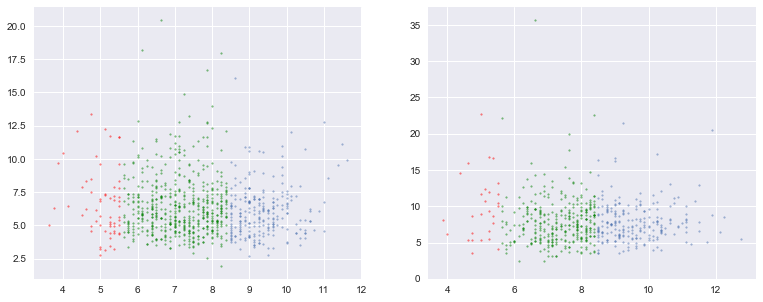

In [32]:
fig=plt.figure(figsize=(20,5))
ax=plt.subplot(131)

plt.scatter(femhighPA['totalPA'],femhighPA['total_kgCO2'],alpha=0.5,s=3)
plt.scatter(femlowPA['totalPA'],femlowPA['total_kgCO2'],color='r',alpha=0.5,s=3)
plt.scatter(femmidPA['totalPA'],femmidPA['total_kgCO2'],color='g',alpha=0.5,s=3)
#ax.set_xlim(1000,5000)
#print femhighPA['kcal'][(2000 < femhighPA['kcal']) & (femhighPA['kcal'] < 2500)].size
ax=plt.subplot(132)
plt.scatter(malhighPA['totalPA'],malhighPA['total_kgCO2'],alpha=0.5,s=3)
plt.scatter(mallowPA['totalPA'],mallowPA['total_kgCO2'],color='r',alpha=0.5,s=3)
plt.scatter(malmidPA['totalPA'],malmidPA['total_kgCO2'],color='g',alpha=0.5,s=3)
#ax.set_xlim(1000,5000)
ax.set_ylim(0)


In [33]:
averages_fem=averages[averages.gender==1]
averages_male=averages[averages.gender==0]
print (averages_fem.shape,averages_male.shape)

(855, 632) (602, 632)


In [34]:
avgkgCO2_real_fem=avgkgCO2_real[avgkgCO2_real.gender==1]
avgkgCO2_real_male=avgkgCO2_real[avgkgCO2_real.gender==0]
print (avgkgCO2_real_fem.shape,avgkgCO2_real_male.shape)

(855, 176) (602, 176)


60
90
247
148
214
127
123


(1000, 4000)

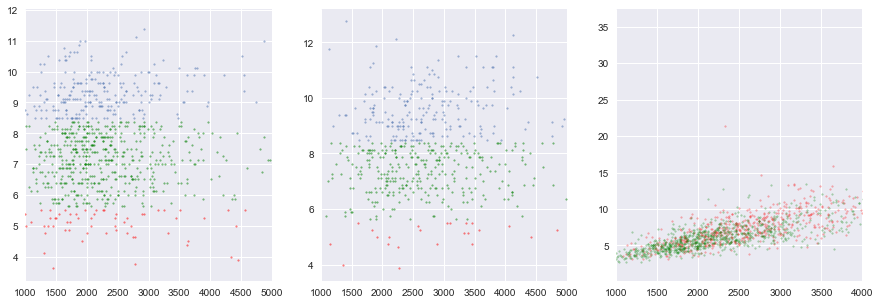

In [35]:
fig=plt.figure(figsize=(15,5))
ax=plt.subplot(131)
plt.scatter(femhighPA['kcal'],femhighPA['totalPA'],alpha=0.5,s=3)
plt.scatter(femlowPA['kcal'],femlowPA['totalPA'],color='r',alpha=0.5,s=3)
plt.scatter(femmidPA['kcal'],femmidPA['totalPA'],color='g',alpha=0.5,s=3)
ax.set_xlim(1000,5000)
print (femhighPA['kcal'][(2000 < femhighPA['kcal']) & (femhighPA['kcal'] < 2500)].size)
ax=plt.subplot(132)
plt.scatter(malhighPA['kcal'],malhighPA['totalPA'],alpha=0.5,s=3)
plt.scatter(mallowPA['kcal'],mallowPA['totalPA'],color='r',alpha=0.5,s=3)
plt.scatter(malmidPA['kcal'],malmidPA['totalPA'],color='g',alpha=0.5,s=3)
ax.set_xlim(1000,5000)
ax=plt.subplot(133)
plt.scatter(averages[averages.gender==0].ix[:,'ENERGY'],avgkgCO2_real[avgkgCO2_real.gender==0].ix[:,'total_kgCO2'],color='r',alpha=0.3,s=3)
plt.scatter(averages[averages.gender==1].ix[:,'ENERGY'],avgkgCO2_real[avgkgCO2_real.gender==1].ix[:,'total_kgCO2'],color='g',alpha=0.3,s=3)
dsa=averages[averages.gender==0].ix[:,'ENERGY']
print (dsa[(1500 < dsa) & (dsa < 2000)].size)
psa=averages[averages.gender==1].ix[:,'ENERGY']
print (psa[(1500 < psa) & (psa < 2000)].size)
rsa=averages[averages.gender==0].ix[:,'ENERGY']
print (rsa[(2000 < rsa) & (rsa < 2500)].size)
tsa=averages[averages.gender==1].ix[:,'ENERGY']
print (tsa[(2000 < tsa) & (tsa < 2500)].size)
zsa=averages[averages.gender==0].ix[:,'ENERGY']
print (zsa[(2500 < zsa) & (zsa < 3000)].size)
usa=averages[averages.gender==1].ix[:,'ENERGY']
print (usa[(2500 < usa) & (usa < 3000)].size)
#print averages[averages.gender==1].ix[:,'ENERGY'][(1500 < averages[averages.gender==1].ix[:,'ENERGY']) & (averages[averages.gender==1].ix[:,'ENERGY'] < 2500)].size
ax.set_xlim(1000,4000)

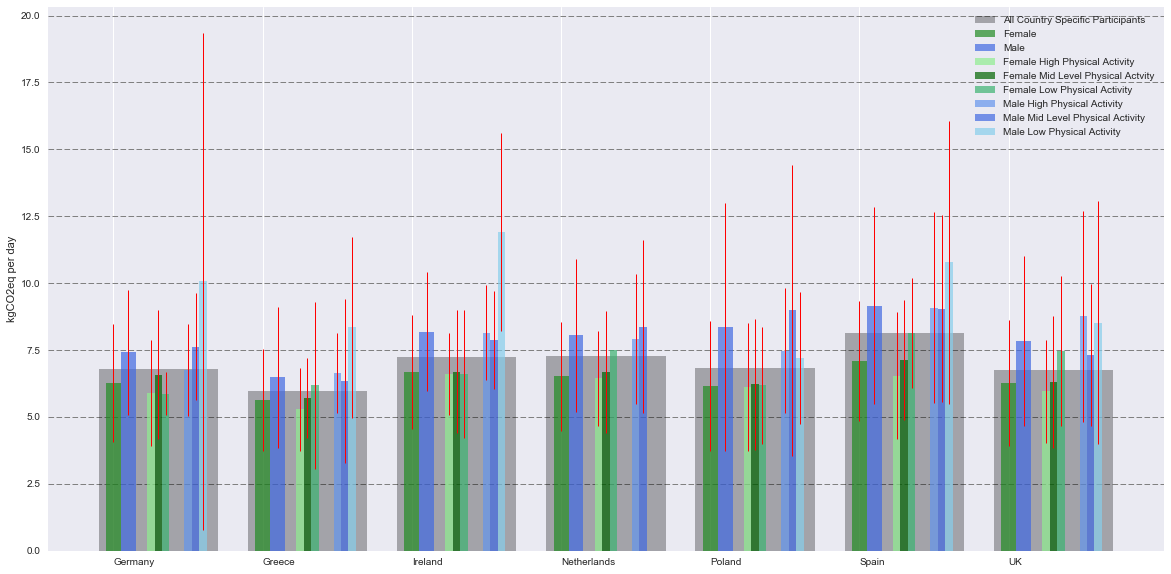

In [36]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
N=7
width=0.2
ind=arange(N)


#avgkgCO2_6to10=kgCO2perfoodtype.query('total_kgCO2>=6 & total_kgCO2<=10')

y=[kgCO2subset_germany['total_kgCO2'].mean(),kgCO2subset_greece['total_kgCO2'].mean(),
   kgCO2subset_ireland['total_kgCO2'].mean(),kgCO2subset_netherlands['total_kgCO2'].mean(),
   kgCO2subset_poland['total_kgCO2'].mean(),kgCO2subset_spain['total_kgCO2'].mean(),kgCO2subset_uk['total_kgCO2'].mean()]
yerr=[kgCO2subset_germany['total_kgCO2'].std(),kgCO2subset_greece['total_kgCO2'].std(),
   kgCO2subset_ireland['total_kgCO2'].std(),kgCO2subset_netherlands['total_kgCO2'].std(),
   kgCO2subset_poland['total_kgCO2'].std(),kgCO2subset_spain['total_kgCO2'].std(),kgCO2subset_uk['total_kgCO2'].std()]

   
fem=[a['total_kgCO2'].mean(),b['total_kgCO2'].mean(),c['total_kgCO2'].mean(),d['total_kgCO2'].mean(),
        e['total_kgCO2'].mean(),f['total_kgCO2'].mean(),g['total_kgCO2'].mean()] 
yerrfem=[a['total_kgCO2'].std(),b['total_kgCO2'].std(),c['total_kgCO2'].std(),d['total_kgCO2'].std(),
        e['total_kgCO2'].std(),f['total_kgCO2'].std(),g['total_kgCO2'].std()] 
mal=[h['total_kgCO2'].mean(),i['total_kgCO2'].mean(),j['total_kgCO2'].mean(),k['total_kgCO2'].mean(),
      l['total_kgCO2'].mean(),m['total_kgCO2'].mean(),n['total_kgCO2'].mean()] 
yerrmale=[h['total_kgCO2'].std(),i['total_kgCO2'].std(),j['total_kgCO2'].std(),k['total_kgCO2'].std(),
     l['total_kgCO2'].std(),m['total_kgCO2'].std(),n['total_kgCO2'].std()] 
fem_highPA=[o['total_kgCO2'].mean(),p['total_kgCO2'].mean(),q['total_kgCO2'].mean(),r['total_kgCO2'].mean(),
            s['total_kgCO2'].mean(),t['total_kgCO2'].mean(),u['total_kgCO2'].mean()] 
yerrfem_highPA=[o['total_kgCO2'].std(),p['total_kgCO2'].std(),q['total_kgCO2'].std(),r['total_kgCO2'].std(),
                s['total_kgCO2'].std(),t['total_kgCO2'].std(),u['total_kgCO2'].std()]
fem_midPA=[o1['total_kgCO2'].mean(),p1['total_kgCO2'].mean(),q1['total_kgCO2'].mean(),r1['total_kgCO2'].mean(),
            s1['total_kgCO2'].mean(),t1['total_kgCO2'].mean(),u1['total_kgCO2'].mean()] 
yerrfem_midPA=[o1['total_kgCO2'].std(),p1['total_kgCO2'].std(),q1['total_kgCO2'].std(),r1['total_kgCO2'].std(),
                s1['total_kgCO2'].std(),t1['total_kgCO2'].std(),u1['total_kgCO2'].std()] 
  
fem_lowPA=[v['total_kgCO2'].mean(),w['total_kgCO2'].mean(),x['total_kgCO2'].mean(),yy['total_kgCO2'].mean(),
           z['total_kgCO2'].mean(),aa['total_kgCO2'].mean(),bb['total_kgCO2'].mean()] 
yerrfem_lowPA=[v['total_kgCO2'].std(),w['total_kgCO2'].std(),x['total_kgCO2'].std(),yy['total_kgCO2'].std(),
        z['total_kgCO2'].std(),aa['total_kgCO2'].std(),bb['total_kgCO2'].std()] 

mal_highPA=[oo['total_kgCO2'].mean(),pp['total_kgCO2'].mean(),qq['total_kgCO2'].mean(),rr['total_kgCO2'].mean(),
            ss['total_kgCO2'].mean(),tt['total_kgCO2'].mean(),uu['total_kgCO2'].mean()]
yerrmal_highPA=[oo['total_kgCO2'].std(),pp['total_kgCO2'].std(),qq['total_kgCO2'].std(),rr['total_kgCO2'].std(),
        ss['total_kgCO2'].std(),tt['total_kgCO2'].std(),uu['total_kgCO2'].std()] 
mal_midPA=[oo1['total_kgCO2'].mean(),pp1['total_kgCO2'].mean(),qq1['total_kgCO2'].mean(),rr1['total_kgCO2'].mean(),
            ss1['total_kgCO2'].mean(),tt1['total_kgCO2'].mean(),uu1['total_kgCO2'].mean()]
yerrmal_midPA=[oo1['total_kgCO2'].std(),pp1['total_kgCO2'].std(),qq1['total_kgCO2'].std(),rr1['total_kgCO2'].std(),
        ss1['total_kgCO2'].std(),tt1['total_kgCO2'].std(),uu1['total_kgCO2'].std()] 

mal_lowPA=[vv['total_kgCO2'].mean(),ww['total_kgCO2'].mean(),xx['total_kgCO2'].mean(),yyy['total_kgCO2'].mean(),
           zz['total_kgCO2'].mean(),aaa['total_kgCO2'].mean(),bbb['total_kgCO2'].mean()] 
yerrmal_lowPA=[vv['total_kgCO2'].std(),ww['total_kgCO2'].std(),xx['total_kgCO2'].std(),yyy['total_kgCO2'].std(),
        zz['total_kgCO2'].std(),aaa['total_kgCO2'].std(),bbb['total_kgCO2'].std()] 


total=ax.bar(ind+2.5*width,y,align='center',alpha=0.3,color='black',width=0.8)
female=ax.bar(ind+width,fem,align='center',alpha=0.7,color='forestgreen',width=0.1,yerr=yerrfem,error_kw=dict(elinewidth=1,ecolor='red'))

femalehighPA=ax.bar(ind+2.25*width,fem_highPA,align='center',alpha=0.7,color='lightgreen',width=0.05,yerr=yerrfem_highPA,error_kw=dict(elinewidth=1,ecolor='red'))    
femalemidPA=ax.bar(ind+2.5*width,fem_midPA,align='center',alpha=0.7,color='darkgreen',width=0.05,yerr=yerrfem_midPA,error_kw=dict(elinewidth=1,ecolor='red'))   
femalelowPA=ax.bar(ind+2.75*width,fem_lowPA,align='center',alpha=0.7,color='mediumseagreen',width=0.05,yerr=yerrfem_lowPA,error_kw=dict(elinewidth=1,ecolor='red'))    

male=ax.bar(ind+1.5*width,mal,align='center',alpha=0.7,color='royalblue',width=0.1,yerr=yerrmale,error_kw=dict(elinewidth=1,ecolor='red'))    
malehighPA=ax.bar(ind+3.5*width,mal_highPA,align='center',alpha=0.7,color='cornflowerblue',width=0.05,yerr=yerrmal_highPA,error_kw=dict(elinewidth=1,ecolor='red'))    
malemidPA=ax.bar(ind+3.75*width,mal_midPA,align='center',alpha=0.7,color='royalblue',width=0.05,yerr=yerrmal_midPA,error_kw=dict(elinewidth=1,ecolor='red'))    
malelowPA=ax.bar(ind+4.0*width,mal_lowPA,align='center',alpha=0.7,color='skyblue',width=0.05,yerr=yerrmal_lowPA,error_kw=dict(elinewidth=1,ecolor='red'))    


xTickMarks=['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK']
ax.set_xticks(ind+width)
ax.set_xticklabels(xTickMarks,ha='left')
#ax.set_xlabel("Countries")
ax.set_ylabel('kgCO2eq per day')
ax.yaxis.grid(color='gray',linestyle='dashed')
#ax.set_ylim((0,1.6))
ax.legend((total[0],female[0],male[0],femalehighPA[0],femalemidPA[0],femalelowPA[0],malehighPA[0],malemidPA[0],malelowPA[0]),
          ('All Country Specific Participants','Female','Male','Female High Physical Activity','Female Mid Level Physical Actvity',
           'Female Low Physical Activity',
          'Male High Physical Activity','Male Mid Level Physical Activity','Male Low Physical Activity'),loc=0)

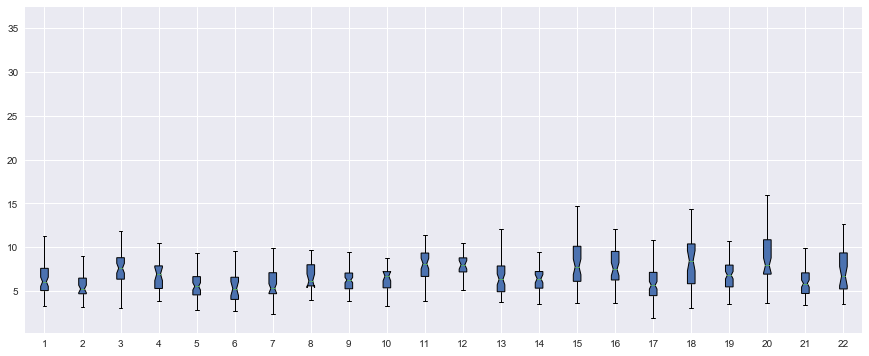

In [37]:
fig=plt.figure(figsize=(15,6))

data=[kgCO2subset_germany.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_germany.query('gender==1&totalPA>8.5')['total_kgCO2'],
      kgCO2subset_germany.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_germany.query('gender==0&totalPA>8.5')['total_kgCO2'],
      kgCO2subset_greece.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_greece.query('gender==1&totalPA>8.5')['total_kgCO2'],
      kgCO2subset_greece.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_greece.query('gender==0&totalPA>8.5')['total_kgCO2'],
   kgCO2subset_ireland.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_ireland.query('gender==1&totalPA>8.5')['total_kgCO2'],
      kgCO2subset_ireland.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_ireland.query('gender==0&totalPA>8.5')['total_kgCO2'],
      kgCO2subset_netherlands.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_netherlands.query('gender==1&totalPA>8.5')['total_kgCO2'],
      kgCO2subset_netherlands.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_netherlands.query('gender==0&totalPA>8.5')['total_kgCO2'],
   kgCO2subset_poland.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_poland.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_spain.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'], 
      kgCO2subset_spain.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_uk.query('gender==1&totalPA<8.5&totalPA>5.5')['total_kgCO2'],
      kgCO2subset_uk.query('gender==0&totalPA<8.5&totalPA>5.5')['total_kgCO2']]

plt.boxplot(data,notch=True,patch_artist=True,widths=0.2)
LABELS =['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK']
y=[1.5,3.5,5.5,7.5,9.5,11.5,13.5]
#ax.set_xticklabels(y, LABELS,ha='center')

#plt.setp(bplot['boxes'], color='gray')
#plt.setp(bplot['whiskers'], color='black')
#plt.setp(bplot['fliers'], color='black', marker='+')
#plt.setp(bplot['medians'],color='red',linewidth=1)
plt.savefig('food groups per country_box.png')         

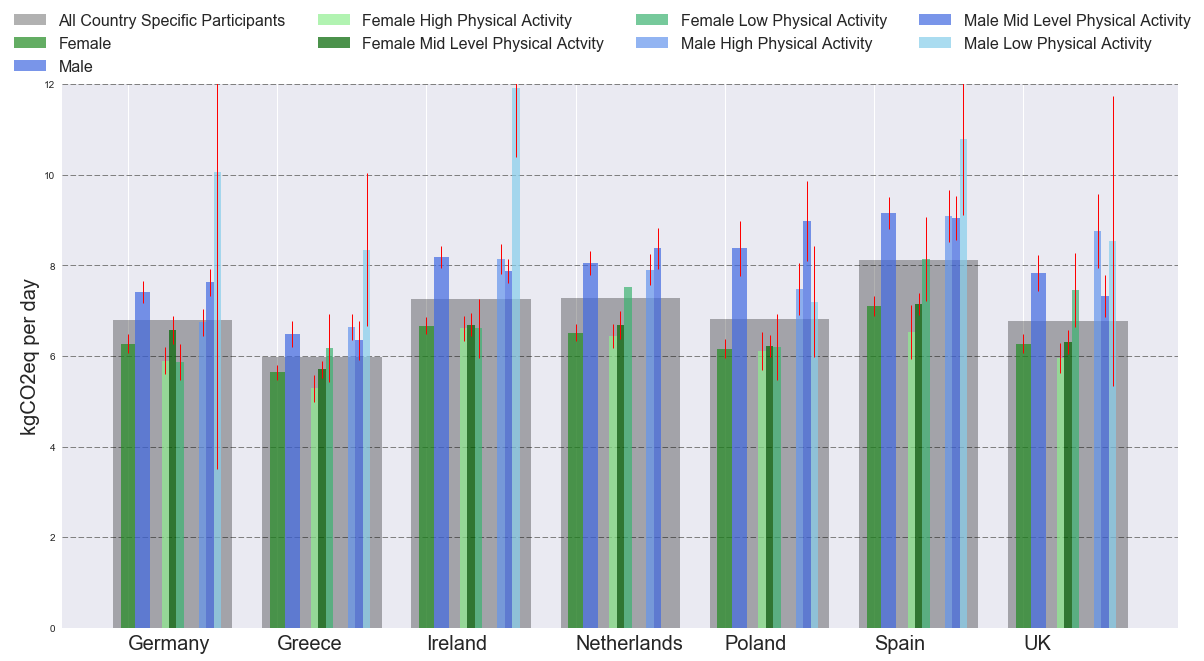

In [38]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
N=7
width=0.2
ind=arange(N)


#avgkgCO2_6to10=kgCO2perfoodtype.query('total_kgCO2>=6 & total_kgCO2<=10')

y=[kgCO2subset_germany['total_kgCO2'].mean(),kgCO2subset_greece['total_kgCO2'].mean(),
   kgCO2subset_ireland['total_kgCO2'].mean(),kgCO2subset_netherlands['total_kgCO2'].mean(),
   kgCO2subset_poland['total_kgCO2'].mean(),kgCO2subset_spain['total_kgCO2'].mean(),kgCO2subset_uk['total_kgCO2'].mean()]
yerr=[kgCO2subset_germany['total_kgCO2'].sem(),kgCO2subset_greece['total_kgCO2'].sem(),
   kgCO2subset_ireland['total_kgCO2'].sem(),kgCO2subset_netherlands['total_kgCO2'].sem(),
   kgCO2subset_poland['total_kgCO2'].sem(),kgCO2subset_spain['total_kgCO2'].sem(),kgCO2subset_uk['total_kgCO2'].sem()]

   
fem=[a['total_kgCO2'].mean(),b['total_kgCO2'].mean(),c['total_kgCO2'].mean(),d['total_kgCO2'].mean(),
        e['total_kgCO2'].mean(),f['total_kgCO2'].mean(),g['total_kgCO2'].mean()] 
yerrfem=[a['total_kgCO2'].sem(),b['total_kgCO2'].sem(),c['total_kgCO2'].sem(),d['total_kgCO2'].sem(),
        e['total_kgCO2'].sem(),f['total_kgCO2'].sem(),g['total_kgCO2'].sem()] 
mal=[h['total_kgCO2'].mean(),i['total_kgCO2'].mean(),j['total_kgCO2'].mean(),k['total_kgCO2'].mean(),
      l['total_kgCO2'].mean(),m['total_kgCO2'].mean(),n['total_kgCO2'].mean()] 
yerrmale=[h['total_kgCO2'].sem(),i['total_kgCO2'].sem(),j['total_kgCO2'].sem(),k['total_kgCO2'].sem(),
     l['total_kgCO2'].sem(),m['total_kgCO2'].sem(),n['total_kgCO2'].sem()] 
fem_highPA=[o['total_kgCO2'].mean(),p['total_kgCO2'].mean(),q['total_kgCO2'].mean(),r['total_kgCO2'].mean(),
            s['total_kgCO2'].mean(),t['total_kgCO2'].mean(),u['total_kgCO2'].mean()] 
yerrfem_highPA=[o['total_kgCO2'].sem(),p['total_kgCO2'].sem(),q['total_kgCO2'].sem(),r['total_kgCO2'].sem(),
                s['total_kgCO2'].sem(),t['total_kgCO2'].sem(),u['total_kgCO2'].sem()]
fem_midPA=[o1['total_kgCO2'].mean(),p1['total_kgCO2'].mean(),q1['total_kgCO2'].mean(),r1['total_kgCO2'].mean(),
            s1['total_kgCO2'].mean(),t1['total_kgCO2'].mean(),u1['total_kgCO2'].mean()] 
yerrfem_midPA=[o1['total_kgCO2'].sem(),p1['total_kgCO2'].sem(),q1['total_kgCO2'].sem(),r1['total_kgCO2'].sem(),
                s1['total_kgCO2'].sem(),t1['total_kgCO2'].sem(),u1['total_kgCO2'].sem()] 
  
fem_lowPA=[v['total_kgCO2'].mean(),w['total_kgCO2'].mean(),x['total_kgCO2'].mean(),yy['total_kgCO2'].mean(),
           z['total_kgCO2'].mean(),aa['total_kgCO2'].mean(),bb['total_kgCO2'].mean()] 
yerrfem_lowPA=[v['total_kgCO2'].sem(),w['total_kgCO2'].sem(),x['total_kgCO2'].sem(),yy['total_kgCO2'].sem(),
        z['total_kgCO2'].sem(),aa['total_kgCO2'].sem(),bb['total_kgCO2'].sem()] 

mal_highPA=[oo['total_kgCO2'].mean(),pp['total_kgCO2'].mean(),qq['total_kgCO2'].mean(),rr['total_kgCO2'].mean(),
            ss['total_kgCO2'].mean(),tt['total_kgCO2'].mean(),uu['total_kgCO2'].mean()]
yerrmal_highPA=[oo['total_kgCO2'].sem(),pp['total_kgCO2'].sem(),qq['total_kgCO2'].sem(),rr['total_kgCO2'].sem(),
        ss['total_kgCO2'].sem(),tt['total_kgCO2'].sem(),uu['total_kgCO2'].sem()] 
mal_midPA=[oo1['total_kgCO2'].mean(),pp1['total_kgCO2'].mean(),qq1['total_kgCO2'].mean(),rr1['total_kgCO2'].mean(),
            ss1['total_kgCO2'].mean(),tt1['total_kgCO2'].mean(),uu1['total_kgCO2'].mean()]
yerrmal_midPA=[oo1['total_kgCO2'].sem(),pp1['total_kgCO2'].sem(),qq1['total_kgCO2'].sem(),rr1['total_kgCO2'].sem(),
        ss1['total_kgCO2'].sem(),tt1['total_kgCO2'].sem(),uu1['total_kgCO2'].sem()] 

mal_lowPA=[vv['total_kgCO2'].mean(),ww['total_kgCO2'].mean(),xx['total_kgCO2'].mean(),yyy['total_kgCO2'].mean(),
           zz['total_kgCO2'].mean(),aaa['total_kgCO2'].mean(),bbb['total_kgCO2'].mean()] 
yerrmal_lowPA=[vv['total_kgCO2'].sem(),ww['total_kgCO2'].sem(),xx['total_kgCO2'].sem(),yyy['total_kgCO2'].sem(),
        zz['total_kgCO2'].sem(),aaa['total_kgCO2'].sem(),bbb['total_kgCO2'].sem()] 


total=ax.bar(ind+2.5*width,y,align='center',alpha=0.3,color='black',width=0.8)
female=ax.bar(ind+width,fem,align='center',alpha=0.7,color='forestgreen',width=0.1,yerr=yerrfem,error_kw=dict(elinewidth=1,ecolor='red'))

femalehighPA=ax.bar(ind+2.25*width,fem_highPA,align='center',alpha=0.7,color='lightgreen',width=0.05,yerr=yerrfem_highPA,error_kw=dict(elinewidth=1,ecolor='red'))    
femalemidPA=ax.bar(ind+2.5*width,fem_midPA,align='center',alpha=0.7,color='darkgreen',width=0.05,yerr=yerrfem_midPA,error_kw=dict(elinewidth=1,ecolor='red'))   
femalelowPA=ax.bar(ind+2.75*width,fem_lowPA,align='center',alpha=0.7,color='mediumseagreen',width=0.05,yerr=yerrfem_lowPA,error_kw=dict(elinewidth=1,ecolor='red'))    

male=ax.bar(ind+1.5*width,mal,align='center',alpha=0.7,color='royalblue',width=0.1,yerr=yerrmale,error_kw=dict(elinewidth=1,ecolor='red'))    
malehighPA=ax.bar(ind+3.5*width,mal_highPA,align='center',alpha=0.7,color='cornflowerblue',width=0.05,yerr=yerrmal_highPA,error_kw=dict(elinewidth=1,ecolor='red'))    
malemidPA=ax.bar(ind+3.75*width,mal_midPA,align='center',alpha=0.7,color='royalblue',width=0.05,yerr=yerrmal_midPA,error_kw=dict(elinewidth=1,ecolor='red'))    
malelowPA=ax.bar(ind+4.0*width,mal_lowPA,align='center',alpha=0.7,color='skyblue',width=0.05,yerr=yerrmal_lowPA,error_kw=dict(elinewidth=1,ecolor='red'))    


xTickMarks=['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK']
ax.set_xticks(ind+width)
ax.set_xticklabels(xTickMarks,ha='left',fontsize=20)
#ax.set_xlabel("Countries")
ax.set_ylabel('kgCO2eq per day',fontsize=20)
ax.yaxis.grid(color='gray',linestyle='dashed')
#ax.set_ylim((0,1.6))
ax.legend((total[0],female[0],male[0],femalehighPA[0],femalemidPA[0],femalelowPA[0],malehighPA[0],malemidPA[0],malelowPA[0]),
          ('All Country Specific Participants','Female','Male','Female High Physical Activity','Female Mid Level Physical Actvity',
           'Female Low Physical Activity',
          'Male High Physical Activity','Male Mid Level Physical Activity','Male Low Physical Activity'),
          loc='upper center',fontsize=16,bbox_to_anchor=(0,-0.001,1,1),bbox_transform = plt.gcf().transFigure,ncol=4)
#bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes
ax.set_ylim(0,12)
fig.savefig("PA_sig.png",bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


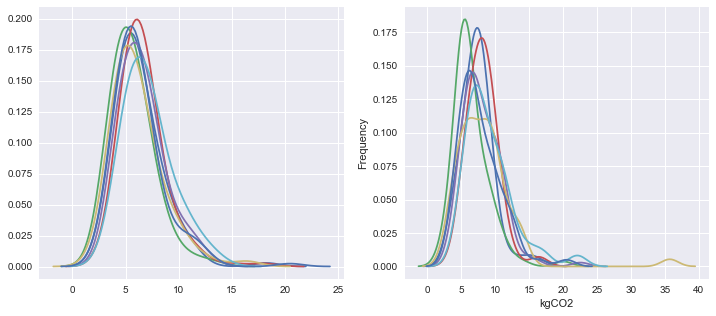

In [39]:
#data=[avgkgCO2_real['total_kgCO2'].query(avgkgCO2_real['country'==0])]

data=[a['total_kgCO2'],b['total_kgCO2'],c['total_kgCO2'],d['total_kgCO2'],e['total_kgCO2'],f['total_kgCO2'],g['total_kgCO2']]
datas=[h['total_kgCO2'],i['total_kgCO2'],j['total_kgCO2'],k['total_kgCO2'],l['total_kgCO2'],m['total_kgCO2'],n['total_kgCO2']]

labels=['Germany Female', 'Greece Female','Ireland Female','Netherlands Female',
        'Poland Female','Spain Female','UK Female']
colors=['b','g','k','c','r','y','m']
test=[1,2,3,4,5,6,7]


fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
for i in data:
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(i), bw=1.25,#label=str(labels),
    ax=ax1)#labels(i))
    
plt.legend(labels)
plt.xlabel('kgCO2')
plt.ylabel('Frequency')

for j in datas:
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(j), bw=1.25,#label=str(labels),
    ax=ax2)#labels(i))

#plt.xlim(2,15)
#plt.ylim(0.06,0.16)

### Food group analysis

#### determine kgCO2 for each food group by summing the foods in that group

#####  http://localhost:8888/notebooks/Documents/Python/Food%20Groups%20and%20Nutrients.ipynb

### Plotting the data

##### MAR plot of kgCO2 versus uncorrected MAR

In [40]:
len(MAR)

1457

In [41]:
MAR.head()

,PROTEIN,VITAMIN A-RE,THIAMIN,RIBOFLAVIN,NIACIN,VITAMIN B6,FOLATE,VITAMIN B12,VITAMIN C,VITAMIN E,...,MG,ZN,CU,I,SE,DF,total_nutrients,country,kgCO2,WFP
0,1.0,1.0,1.0,1.0,1.0,1.0,0.964291,1.0,1.0,0.634032,...,1.000000,1.0,1.000000,1.0,1.0,0.898086,0.955484,0,4.42,185.789349
1,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.730997,...,1.000000,1.0,0.772166,1.0,1.0,1.000000,0.973851,0,7.58,347.139681
2,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,0,8.20,355.514993
3,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,0,4.46,235.387739
4,1.0,1.0,1.0,1.0,1.0,1.0,0.977869,1.0,1.0,1.000000,...,0.857945,1.0,0.928734,1.0,1.0,0.870008,0.957851,0,5.20,191.717472


LinregressResult(slope=19.23503002706941, intercept=-11.292503980249609, rvalue=0.48124217741696024, pvalue=2.5371247548015092e-85, stderr=0.91852938190219613)


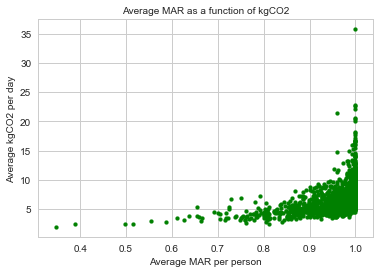

In [42]:
fig_MAR=plt.scatter(MAR['total_nutrients'],avgkgCO2_real['total_kgCO2'],c='g',s=15,label='0')
plt.title('Average MAR as a function of kgCO2',fontsize=10)
plt.xlabel('Average MAR per person',fontsize=10)
plt.ylabel('Average kgCO2 per day',fontsize=10) 
print (linregress(MAR['total_nutrients'],avgkgCO2_real['total_kgCO2']))
#reg.summary()

In [43]:

NRF_93['final']=(np.sum(NRF_93.ix[:,'PROTEIN':'DF'],axis=1).round(2)
                 -np.sum(NRF_93.ix[:,'SAT FAT':'NA'],axis=1).round(2))
NRF_93['FAKE']=np.sum(NRF_93.ix[:,'PROTEIN':'DF'],axis=1).round(2)
                 
  
NRF_93.head()
#MAR_corrected['total_nutrients_corrected']=(np.sum(MAR_corrected.ix[:,'PROTEIN':'DF'],axis=1)/numnutrients).round(2)
#NRF_93_corrected['NRFperkcal']=NRF_93_corrected['NRF_sum'].div(averages['ENERGY'])
#MAR_corrected['MARper100kcal']=(MAR_corrected['total_nutrients_corrected'].div(averages['ENERGY'])*100).round(3)
#MAR_corrected['kgCO2']=avgkgCO2_real['total_kgCO2']
#MAR_corrected['country']=food4me['country']

,PROTEIN,VITAMIN A-RE,VITAMIN C,VITAMIN E,CA,K,FE,MG,DF,SAT FAT,...,country,gender,masterid,kcal,kcalnorm,NRF93_sum,NRFper100kcal,MER,final,FAKE
0,1.486038,2.118360,2.877839,0.634032,1.365509,0.936059,0.721719,1.133912,0.898086,2.151975,...,0,1,1,2002.532204,0.136709,8.146594,0.004068,1.427387,8.15,12.17
1,1.861937,1.803944,9.142652,0.730997,2.995840,1.365118,1.203713,1.093559,1.207906,2.259794,...,0,0,7,2600.144003,0.191068,16.431866,0.006320,1.657933,16.44,21.41
2,3.327465,5.025657,6.765584,1.206553,2.734135,1.677482,1.310148,1.760903,1.789014,2.360887,...,0,1,13,2955.578736,0.223398,20.295842,0.006867,1.767034,20.30,25.60
3,1.937388,6.672048,5.766519,1.371122,2.607335,1.296152,1.002633,1.392944,1.552230,1.389158,...,0,1,19,2336.732040,0.167108,19.979255,0.008550,1.206909,19.98,23.60
4,1.315239,4.179525,3.756309,1.457354,1.897603,0.885425,0.679196,0.857945,0.870008,1.327905,...,0,1,25,1974.875831,0.134193,12.991395,0.006578,1.109302,12.99,15.90


LinregressResult(slope=108.98413163088874, intercept=519.55506307287055, rvalue=0.73574931698931667, pvalue=1.5738842897151461e-248, stderr=2.6299861695913971)


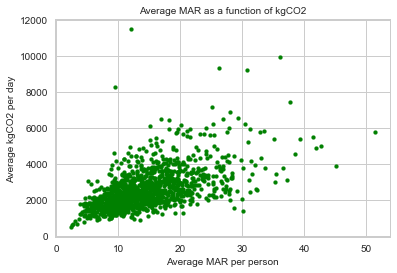

In [44]:
fig_MAR=plt.scatter(NRF_93['final'],averages['ENERGY'],c='g',s=15,label='0')
plt.title('Average MAR as a function of kgCO2',fontsize=10)
plt.xlabel('Average MAR per person',fontsize=10)
plt.ylabel('Average kgCO2 per day',fontsize=10) 
print (linregress(NRF_93['FAKE'],averages['ENERGY']))

#reg.summary()

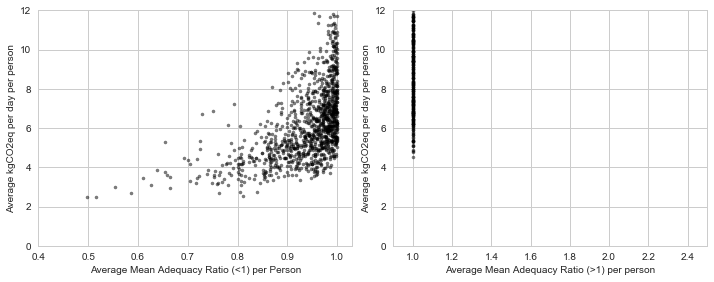

In [45]:
MAR_plot=pd.concat([avgkgCO2_real,MAR],axis=1)
#plot of people with average MAR<1 (a total of 124 people out of 1478)
x_1=MAR_plot[MAR_plot['total_nutrients']<1]

y=x_1['total_kgCO2']
x=x_1['total_nutrients']
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(x,y,color='k',s=10,label='0',alpha=0.5)
#m,b=np.polyfit(x,y,1)
b=0
#plt.plot(x,m*x+b,'-',color='k',lw=0.5)
plt.xlim(xmax=1.03,xmin=0.4)
plt.ylim(ymax=12,ymin=0)
#reg=sm.OLS(x,y,missing='drop').fit()
#reg.summary()
#plt.title('kgCO2eq as related to individual MAR',fontsize=10)
plt.xlabel('Average Mean Adequacy Ratio (<1) per Person',fontsize=10)
plt.ylabel('Average kgCO2eq per day per person',fontsize=10) 
#plt.savefig('MARlessthan1.png')


#plot of people with average MAR>=1 (a total of 1354 people out of 1478)
x_1=MAR_plot[MAR_plot['total_nutrients']>=1]
y=x_1['total_kgCO2']
x=x_1['total_nutrients']
plt.subplot(122)
plt.scatter(x,y,color='k',s=10,alpha=0.5)
plt.xlim(xmax=2.5,xmin=0.9)
plt.ylim(ymax=12,ymin=0)

#reg=sm.OLS(x,y,missing='drop').fit()
#reg.summary()
#plt.title('kgCO2eq as related to individual MAR',fontsize=10)
plt.xlabel('Average Mean Adequacy Ratio (>1) per person',fontsize=10)
plt.ylabel('Average kgCO2eq per day per person',fontsize=10) 
slope, intercept, r_value, p_value, std_err = linregress(MAR['total_nutrients'],avgkgCO2_real['total_kgCO2'])

#m,b=np.polyfit(x,y,1)
b=0
#plt.plot(x,m*x+b,'-',color='k',lw=0.5)

#plt.savefig('MARgreaterthan1.png')
plt.tight_layout(pad=1,w_pad=1,h_pad=1.0)
plt.savefig('MAR.png')

In [46]:
factors=['slope', 'intercept', 'r_value', 'p_value', 'std_err']
regression=[slope, intercept, r_value, p_value, std_err]

In [47]:
a=MAR.ix[:,'PROTEIN':'DF']
b=[ED.ix[:,'SAT FAT':'NA'],ED.ix[:,'kgCO2'],food4me['country']]
c=avgkgCO2_real['total_kgCO2']
d=ED['kgCO2']
df1=pd.concat(b,axis=1)
e=[a,c]
df2=pd.concat(e,axis=1)
df1.head()

,SAT FAT,SUGARS,NA,kgCO2,country
0,48.22,137.63,2554.22,8.79,0.0
1,44.32,169.62,2376.24,11.42,0.0
2,34.74,135.81,2313.89,11.74,0.0
3,26.10,135.30,2215.73,4.69,0.0
4,21.51,83.65,1887.01,5.23,0.0


##SUBPLOTS DEFINITIONS (when sharing an axis or row or etc)
#http://matplotlib.org/examples/pylab_examples/subplots_demo.html
####http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

## Subsetting the data based on country

LinregressResult(slope=0.0021180784079672132, intercept=1.5467951981123136, rvalue=0.78545693722033683, pvalue=3.5687042939421455e-44, stderr=0.00011713955298716728)


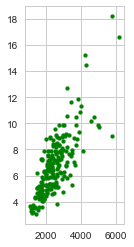

In [48]:
ax=plt.subplot(131)
plt.scatter(subset_germany['ENERGY'],kgCO2subset_germany['total_kgCO2'],c='g',s=15,label='Germany')
print (linregress(subset_germany['ENERGY'],kgCO2subset_germany['total_kgCO2']))
#est_germany=sm.OLS(subset_germany['ENERGY'],kgCO2subset_germany['total_kgCO2'],missing='drop').fit()
#fig=sm.graphics.plot_regress_exog(est_germany,'kgCO2averagefor5days',fig=fig)
#print est_germany.summary()
#print est_germany.params

LinregressResult(slope=0.0020912941905066713, intercept=1.6886735899878698, rvalue=0.81080973649766142, pvalue=0.0, stderr=3.9577693479492178e-05)
LinregressResult(slope=3.631624290230711e-05, intercept=0.85930196396184289, rvalue=0.56277386648799543, pvalue=1.7482275918187754e-122, stderr=1.3984167585474421e-06)
LinregressResult(slope=19.23503002706941, intercept=-11.292503980249609, rvalue=0.48124217741696024, pvalue=2.5371247548015092e-85, stderr=0.91852938190219613)


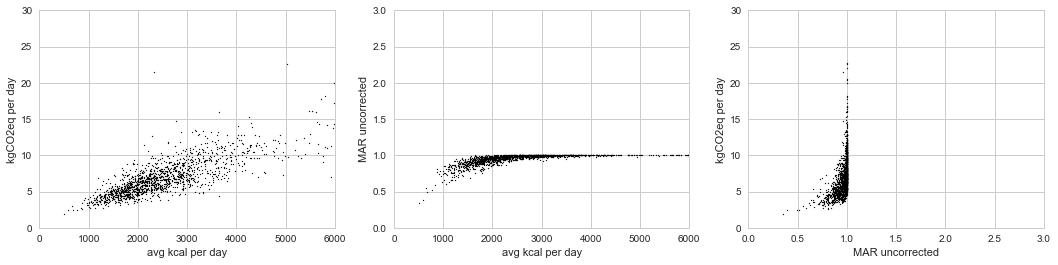

In [49]:
x=averages['ENERGY']
y=avgkgCO2_real['total_kgCO2']
plt.figure(figsize=(18,4))
plt.subplot(131)
plt.scatter(x,y,color='k',s=1)
plt.xlim((0,6000))
plt.ylim((0,30))
plt.xlabel('avg kcal per day')
plt.ylabel('kgCO2eq per day')
m,b=np.polyfit(x,y,1)
#plt.plot(x,m*x+b,'-',c='k')
print (linregress(averages['ENERGY'],avgkgCO2_real['total_kgCO2']))

x_1=averages['ENERGY']
y_1=MAR['total_nutrients']
plt.subplot(132)
plt.scatter(x_1,y_1,color='k',s=1)
plt.xlim((0,6000))
plt.ylim((0,3))
plt.xlabel('avg kcal per day')
plt.ylabel('MAR uncorrected')
print (linregress(averages['ENERGY'],MAR['total_nutrients']))

x_2=MAR['total_nutrients']
y_2=avgkgCO2_real['total_kgCO2']
plt.subplot(133)
plt.scatter(x_2,y_2,color='k',s=1)
plt.xlim((0,3))
plt.ylim((0,30))
plt.xlabel('MAR uncorrected')
plt.ylabel('kgCO2eq per day')
print (linregress(MAR['total_nutrients'],avgkgCO2_real['total_kgCO2']))
plt.savefig('MARvsothers.png',bbox_inches='tight')
#print len(x)

In [52]:
MAR['gender']=food4me['gender']

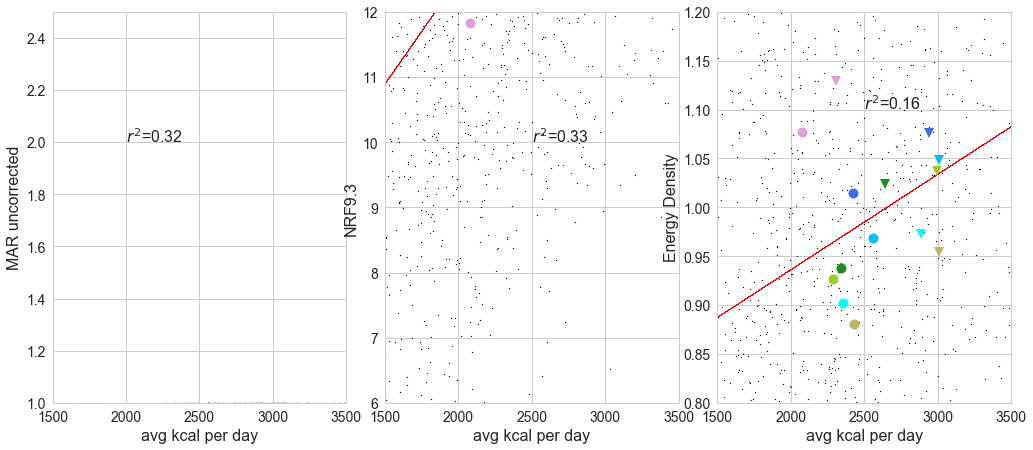

In [53]:
MAR['energy']=averages['ENERGY']
MAR['country']=averages['country']
x_1=averages['ENERGY']
y_1=MAR['total_nutrients']
y_2=NRF_93['NRF93_sum']
y_3=averages['Energy_Density']
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(14,6))

plt.tight_layout()
plt.subplots_adjust(hspace = .1)
ax[0].scatter(x_1,y_1,color='k',s=1)
ax[0].tick_params(axis='both', which='major', labelsize=14)
slope,intercept,rvalue,pvalue,stderr=linregress(averages['ENERGY'],MAR['total_nutrients'])
ax[0].plot(averages['ENERGY'],slope*averages['ENERGY']+intercept,'-',color='red',lw=0.1)
ax[0].set_xlim((1500,3500))
ax[0].set_ylim((1,2.5))
ax[0].set_xlabel('avg kcal per day',fontsize=16)
ax[0].set_ylabel('MAR uncorrected',fontsize=16)
ax[0].text(2000,2,#'y=%0.5f*x+%0.1f\n 
           '$r^2$=%0.2f'%(#slope,intercept,
        rvalue*rvalue),fontsize=16)
ax[1].scatter(x_1,y_2,color='k',s=1)
slope,intercept,rvalue,pvalue,stderr=linregress(averages['ENERGY'],y_2)
ax[1].plot(averages['ENERGY'],slope*averages['ENERGY']+intercept,'-',color='red',lw=0.1)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_xlim((1500,3500))
ax[1].set_ylim((6,12))
ax[1].set_xlabel('avg kcal per day',fontsize=16)
ax[1].set_ylabel('NRF9.3',fontsize=16)
ax[1].text(2500,10,#'y=%0.5f*x+%0.1f\n 
           '$r^2$=%0.2f'%(#slope,intercept,
        rvalue*rvalue),fontsize=16)
ax[2].scatter(x_1,y_3,color='k',s=1)
slope,intercept,rvalue,pvalue,stderr=linregress(averages['ENERGY'],y_3)
ax[2].plot(averages['ENERGY'],slope*averages['ENERGY']+intercept,'-',color='red',lw=0.1)
ax[2].tick_params(axis='both', which='major', labelsize=14)
ax[2].set_xlim((1500,3500))
ax[2].set_ylim((0.8,1.2))
ax[2].set_xlabel('avg kcal per day',fontsize=16)
ax[2].set_ylabel('Energy Density',fontsize=16)
ax[2].text(2500,1.1,#'y=%0.5f*x+%0.1f\n 
           '$r^2$=%0.2f'%(#slope,intercept,
        rvalue*rvalue),fontsize=16)


country=[0,1,2,3,4,5,6]
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','royalblue','cyan']
for i,j in zip(country,colors):
    value=MAR[MAR['country']==i]
    value2=NRF_93[NRF_93['country']==i]
    value3=averages[averages['country']==i]
    gender=[0,1]
    marker=['v','o']
    for k,l in zip(gender,marker):
        sub=value[value['gender']==k]['energy'].mean()
        sub1=value[value['gender']==k]['total_nutrients'].mean()
        sub2=value2[value2['gender']==k]['NRF93_sum'].mean()
        sub3=value3[value3['gender']==k]['Energy_Density'].mean()
        ax[0].plot(sub,sub1,color=j,marker=l,markersize=10)
        ax[1].plot(sub,sub2,color=j,marker=l,markersize=10)
        ax[2].plot(sub,sub3,color=j,marker=l,markersize=10)
plt.show()
fig.savefig('kcal vs nutrition.png',bbox_inches='tight')

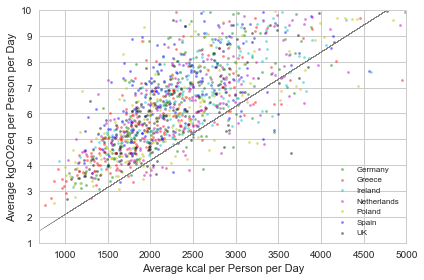

In [54]:
## color codes: b: blue   g: green r: red c: cyan  m: magenta y: yellow  k: black  w: white
fig = plt.figure(figsize=(6, 4))
plt.xlabel("Average kcal per Person per Day")
plt.ylabel("Average kgCO2eq per Person per Day")
plt.scatter(subset_germany['ENERGY'],kgCO2subset_germany['total_kgCO2'],color='g',alpha=0.5,s=5,label='Germany',marker='o')
plt.scatter(subset_greece['ENERGY'],kgCO2subset_greece['total_kgCO2'],color='r',s=5,label='Greece',marker='o',alpha=0.5)
plt.scatter(subset_ireland['ENERGY'],kgCO2subset_ireland['total_kgCO2'],color='c',s=5,label='Ireland',marker='o',alpha=0.5)
plt.scatter(subset_netherlands['ENERGY'],kgCO2subset_netherlands['total_kgCO2'],color='m',s=5,label='Netherlands',marker='o',alpha=0.5)
plt.scatter(subset_poland['ENERGY'],kgCO2subset_poland['total_kgCO2'],color='y',s=5,label='Poland',marker='o',alpha=0.5)
plt.scatter(subset_spain['ENERGY'],kgCO2subset_spain['total_kgCO2'],color='b', s=5,label='Spain',marker='o',alpha=0.5)
plt.scatter(subset_uk['ENERGY'],kgCO2subset_uk['total_kgCO2'],color='k',s=5,label='UK',marker='o',alpha=0.5)
plt.xlim(xmax=5000,xmin=700);plt.ylim(ymax=10,ymin=1)
plt.legend(scatterpoints=1,loc='lower right',fontsize=8,ncol=1)
m,b=np.polyfit(averages['ENERGY'],avgkgCO2_real['total_kgCO2'],1)
b=0
plt.plot(averages['ENERGY'],m*averages['ENERGY']+b,'-',color='gray',lw=0.1)
#print linregress(averages['ENERGY'],sum_per_day['kgCO2averagefor5days'])
fig.tight_layout()
fig.savefig("kgCO2vskcal.png",bbox_inches='tight')

In [55]:
country=['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK']

In [56]:
ger=linregress(subset_germany['ENERGY'],kgCO2subset_germany['total_kgCO2'])
gre=linregress(subset_greece['ENERGY'],kgCO2subset_greece['total_kgCO2'])
ire=linregress(subset_ireland['ENERGY'],kgCO2subset_ireland['total_kgCO2'])
neth=linregress(subset_netherlands['ENERGY'],kgCO2subset_netherlands['total_kgCO2'])
pol=linregress(subset_poland['ENERGY'],kgCO2subset_poland['total_kgCO2'])
spain=linregress(subset_spain['ENERGY'],kgCO2subset_spain['total_kgCO2'])
uk=linregress(subset_uk['ENERGY'],kgCO2subset_uk['total_kgCO2']) 
x=[ger,gre,ire,neth,pol,spain,uk]
print (x)

[LinregressResult(slope=0.0021180784079672132, intercept=1.5467951981123136, rvalue=0.78545693722033683, pvalue=3.5687042939421455e-44, stderr=0.00011713955298716728), LinregressResult(slope=0.002036866992981104, intercept=1.5618588906891446, rvalue=0.80255357486218148, pvalue=4.2326964379334121e-48, stderr=0.00010549302724446016), LinregressResult(slope=0.0016780875059613444, intercept=2.6681394445613638, rvalue=0.83435836534245655, pvalue=9.4911189013630587e-57, stderr=7.6141406519881344e-05), LinregressResult(slope=0.0020326315880839466, intercept=1.7541209998901337, rvalue=0.75271309002593345, pvalue=4.390980833827202e-41, stderr=0.00012096460320087587), LinregressResult(slope=0.0022384890345682248, intercept=1.2309052682945811, rvalue=0.81436419274163119, pvalue=6.5311147587238756e-49, stderr=0.00011308444529437454), LinregressResult(slope=0.0023700602996964736, intercept=1.7744994449220544, rvalue=0.806063413132725, pvalue=9.8647189957995351e-50, stderr=0.00012008172293224971), L

In [57]:
dfg=len(germany_subset)
fgh=len(greece_subset)
ghj=len(ireland_subset)
hjk=len(netherlands_subset)
jkl=len(poland_subset)
wer=len(spain_subset)
rtz=len(uk_subset)
print (dfg,fgh,ghj,hjk,jkl,wer,rtz)

205 208 214 218 201 212 199


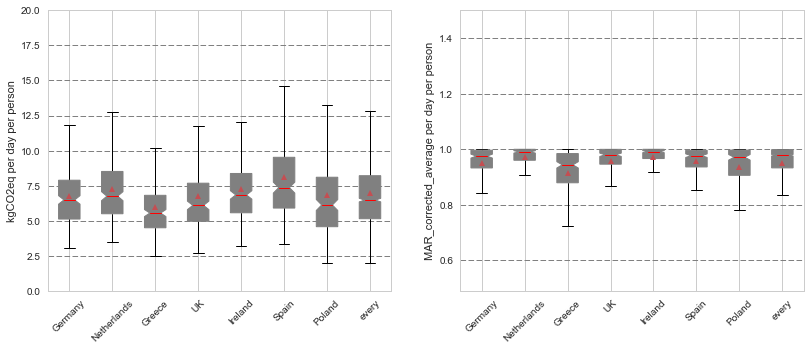

In [58]:
every=avgkgCO2_real['total_kgCO2']
Germany=kgCO2subset_germany['total_kgCO2'];Greece=kgCO2subset_greece['total_kgCO2']
Ireland=kgCO2subset_ireland['total_kgCO2'];Netherlands=kgCO2subset_netherlands['total_kgCO2']
Poland=kgCO2subset_poland['total_kgCO2'];Spain=kgCO2subset_spain['total_kgCO2']
UK=kgCO2subset_uk['total_kgCO2'];
data=[Germany,Netherlands,Greece,UK,Ireland,Spain,Poland,every]
fig = plt.figure(1,figsize=(12, 6)) 
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
ax=fig.add_subplot(121)
bp=plt.boxplot(data,patch_artist=True,notch=1,sym='+',whis=1.5,vert=1,showmeans=True)
#ax2.boxplot(data_MAR,positions=[0],patch_artist=True,notch=0,sym='+',whis=1.5,vert=1,showmeans=True)
plt.setp(bp['boxes'], color='gray')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='black', marker='+',alpha=0.75)
plt.setp(bp['medians'],color='red',linewidth=1)
#change x axis values
labels=['Germany','Netherlands','Greece','UK','Ireland','Spain','Poland','every']

ax.set_xticklabels(labels,rotation=45)
#remove top axes and right axes tick marks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylabel("kgCO2eq per day per person")
ax.yaxis.grid(color='gray',linestyle='dashed')
plt.ylim(ymax=20,ymin=0)


data_MAR=[germany_subset['total_nutrients_corrected'],netherlands_subset['total_nutrients_corrected'],
          greece_subset['total_nutrients_corrected'], uk_subset['total_nutrients_corrected'],
          ireland_subset['total_nutrients_corrected'],spain_subset['total_nutrients_corrected'],
          poland_subset['total_nutrients_corrected'],MAR_corrected['total_nutrients_corrected']]
         

plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
ax=fig.add_subplot(122)
bp=plt.boxplot(data_MAR,patch_artist=True,sym='+',whis=1.5,vert=1,showmeans=True,notch=1)
colors=['forestgreen','plum',
        'deepskyblue','darkkhaki'
       ,'yellowgreen',
        'cornflowerblue','lightgray']
plt.setp(bp['boxes'], color='gray')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='black', marker='+',alpha=0.75)
plt.setp(bp['medians'],color='red',linewidth=1)
#plt.xlim(0,8)
plt.ylim(0.49,1.5)
ax.set_xticklabels(labels,rotation=45)
#ax.set_xticks([1.5,3.5,5.5,7.5,9.5,11.5,13.5])
ax.set_ylabel("MAR_corrected_average per day per person")
ax.yaxis.grid(color='gray',linestyle='dashed')

plt.show()
fig.savefig('boxplot_MAR.png',bbox_inches='tight') #this saves the figure
#for ax in axes.flatten():
 #   ax.set_yscale('log')
 #   ax.set_yticklabels([])

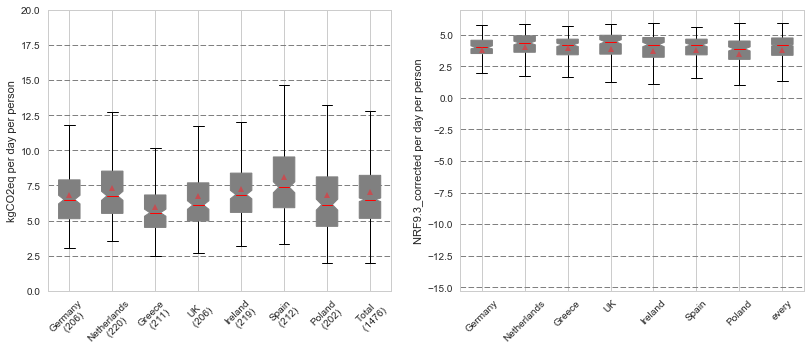

In [59]:
every=avgkgCO2_real['total_kgCO2']
Germany=kgCO2subset_germany['total_kgCO2'];Greece=kgCO2subset_greece['total_kgCO2']
Ireland=kgCO2subset_ireland['total_kgCO2'];Netherlands=kgCO2subset_netherlands['total_kgCO2']
Poland=kgCO2subset_poland['total_kgCO2'];Spain=kgCO2subset_spain['total_kgCO2']
UK=kgCO2subset_uk['total_kgCO2'];

data=[Germany,Netherlands,Greece,UK,Ireland,Spain,Poland,every]
fig = plt.figure(1,figsize=(12, 6)) 
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
ax=fig.add_subplot(121)
bp=plt.boxplot(data,patch_artist=True,notch=1,sym='+',whis=1.5,vert=1,showmeans=True)
#ax2.boxplot(data_MAR,positions=[0],patch_artist=True,notch=0,sym='+',whis=1.5,vert=1,showmeans=True)
plt.setp(bp['boxes'], color='gray')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='black', marker='+',alpha=0.75)
plt.setp(bp['medians'],color='red',linewidth=1)
#change x axis values

ax.set_xticklabels(['Germany\n (206)','Netherlands\n (220)','Greece\n (211)','UK\n (206)','Ireland\n (219)',
                    'Spain\n (212)','Poland\n (202)','Total\n (1476)'],rotation=45)
#remove top axes and right axes tick marks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylabel("kgCO2eq per day per person")
ax.yaxis.grid(color='gray',linestyle='dashed')
plt.ylim(ymax=20,ymin=0)

germany_sub=NRF_93_corrected.query('country == 0')
greece_sub=NRF_93_corrected.query('country==1')
ireland_sub=NRF_93_corrected.query('country==2')
netherlands_sub=NRF_93_corrected.query('country==3')
poland_sub=NRF_93_corrected.query('country==4')
spain_sub=NRF_93_corrected.query('country==5')
uk_sub=NRF_93_corrected.query('country==6')


data_NRF93=[germany_sub['NRF_sum'],netherlands_sub['NRF_sum'],greece_sub['NRF_sum'],uk_sub['NRF_sum'],
          ireland_sub['NRF_sum'],spain_sub['NRF_sum'],
         poland_sub['NRF_sum'],
         NRF_93_corrected['NRF_sum']]


plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
ax=fig.add_subplot(122)
bp=plt.boxplot(data_NRF93,patch_artist=True,sym='+',whis=1.5,vert=1,showmeans=True,notch=1)
colors=['forestgreen','plum',
        'deepskyblue','darkkhaki'
       ,'yellowgreen',
        'cornflowerblue','lightgray']
plt.setp(bp['boxes'], color='gray')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='black', marker='+',alpha=0.75)
plt.setp(bp['medians'],color='red',linewidth=1)
#plt.xlim(0,8)
#plt.ylim(0.49,0.9)
ax.set_xticklabels(labels,rotation=45)
#ax.set_xticks([1.5,3.5,5.5,7.5,9.5,11.5,13.5])
ax.set_ylabel("NRF9.3_corrected per day per person")
ax.yaxis.grid(color='gray',linestyle='dashed')

plt.show()
fig.savefig('boxplot_NRF93.png',bbox_inches='tight') #this saves the figure
#for ax in axes.flatten():
 #   ax.set_yscale('log')
 #   ax.set_yticklabels([])

In [60]:
country=[0,1,2,3,4,5,6]

for i in range(len(country)):
    for j in range(i, len(country)):
        print (i,j,stats.ttest_ind(avgkgCO2_real[avgkgCO2_real['country'] ==i]['total_kgCO2'],
                   avgkgCO2_real[avgkgCO2_real['country'] ==j]['total_kgCO2']))

0 0 Ttest_indResult(statistic=0.0, pvalue=1.0)
0 1 Ttest_indResult(statistic=3.6054340193189502, pvalue=0.00034991442401849859)
0 2 Ttest_indResult(statistic=-2.0296335884017855, pvalue=0.043028293330421095)
0 3 Ttest_indResult(statistic=-2.0123005194268293, pvalue=0.044824677254009765)
0 4 Ttest_indResult(statistic=-0.037181140460210219, pvalue=0.97035894074861384)
0 5 Ttest_indResult(statistic=-4.8156755810831209, pvalue=2.0593204987070395e-06)
0 6 Ttest_indResult(statistic=0.10836996946144685, pvalue=0.91375629053147589)
1 1 Ttest_indResult(statistic=0.0, pvalue=1.0)
1 2 Ttest_indResult(statistic=-5.7481248861845247, pvalue=1.7372565050282575e-08)
1 3 Ttest_indResult(statistic=-5.5056785467666325, pvalue=6.3824508185676669e-08)
1 4 Ttest_indResult(statistic=-2.9227828317938709, pvalue=0.0036627384128383998)
1 5 Ttest_indResult(statistic=-7.8937787664982455, pvalue=2.6024441673676423e-14)
1 6 Ttest_indResult(statistic=-3.1690545352342694, pvalue=0.0016454448624865774)
2 2 Ttest_indRe

In [61]:
country=[0,1,2,3,4,5,6]

for i in range(len(country)):
    for j in range(i, len(country)):
        print (i,j,stats.ttest_ind(MAR_corrected[MAR_corrected['country'] ==i]['total_nutrients_corrected'],
                   MAR_corrected[MAR_corrected['country'] ==j]['total_nutrients_corrected']))

0 0 Ttest_indResult(statistic=0.0, pvalue=1.0)
0 1 Ttest_indResult(statistic=4.4638598565627161, pvalue=1.0410818652941529e-05)
0 2 Ttest_indResult(statistic=-4.1550863195428995, pvalue=3.9469985044565777e-05)
0 3 Ttest_indResult(statistic=-4.2018238905579484, pvalue=3.2346537683783454e-05)
0 4 Ttest_indResult(statistic=1.7732444744955456, pvalue=0.076941538984569388)
0 5 Ttest_indResult(statistic=-1.1656241792082132, pvalue=0.24443591881342772)
0 6 Ttest_indResult(statistic=-1.1737395943540669, pvalue=0.2411942578827945)
1 1 Ttest_indResult(statistic=0.0, pvalue=1.0)
1 2 Ttest_indResult(statistic=-7.8451197195175837, pvalue=3.617853498667895e-14)
1 3 Ttest_indResult(statistic=-7.922791033756809, pvalue=2.0651398008688952e-14)
1 4 Ttest_indResult(statistic=-2.6028265453049011, pvalue=0.0095835982875851246)
1 5 Ttest_indResult(statistic=-5.5997442354877922, pvalue=3.8955968495154541e-08)
1 6 Ttest_indResult(statistic=-5.3466440869200262, pvalue=1.500350460015886e-07)
2 2 Ttest_indResult

In [62]:
country=[0,1,2,3,4,5,6]

for i in range(len(country)):
    for j in range(i, len(country)):
        print (i,j,stats.ranksums(MAR_corrected[MAR_corrected['country'] ==i]['total_nutrients_corrected'],
                   MAR_corrected[MAR_corrected['country'] ==j]['total_nutrients_corrected']))

0 0 RanksumsResult(statistic=0.0, pvalue=1.0)
0 1 RanksumsResult(statistic=4.4625157694607243, pvalue=8.100296520820671e-06)
0 2 RanksumsResult(statistic=-4.395412800248411, pvalue=1.1056244150324121e-05)
0 3 RanksumsResult(statistic=-4.1194452552857488, pvalue=3.797856401778855e-05)
0 4 RanksumsResult(statistic=0.74439103022777509, pvalue=0.45663994392746488)
0 5 RanksumsResult(statistic=-0.38321219234778719, pvalue=0.70156243861454692)
0 6 RanksumsResult(statistic=-1.4262161809705767, pvalue=0.15380595034809763)
1 1 RanksumsResult(statistic=0.0, pvalue=1.0)
1 2 RanksumsResult(statistic=-8.269889720548095, pvalue=1.3408298001631424e-16)
1 3 RanksumsResult(statistic=-8.2154249694671879, pvalue=2.1141420466948306e-16)
1 4 RanksumsResult(statistic=-3.272746243577966, pvalue=0.0010650805192184655)
1 5 RanksumsResult(statistic=-5.0201058166803421, pvalue=5.1643023025630858e-07)
1 6 RanksumsResult(statistic=-5.6380778360744586, pvalue=1.7195878470691618e-08)
2 2 RanksumsResult(statistic=0.0

In [63]:
country=[0,1,2,3,4,5,6]

for i in range(len(country)):
    for j in range(i, len(country)):
        print (i,j,stats.ranksums(NRF_93_corrected[NRF_93_corrected['country'] ==i]['NRF_sum'],
                   NRF_93_corrected[NRF_93_corrected['country'] ==j]['NRF_sum']))


0 0 RanksumsResult(statistic=0.0, pvalue=1.0)
0 1 RanksumsResult(statistic=-1.0083430551594394, pvalue=0.31328980021660902)
0 2 RanksumsResult(statistic=-1.2589450047530564, pvalue=0.20805019667614633)
0 3 RanksumsResult(statistic=-3.0112973719697234, pvalue=0.0026013395690497854)
0 4 RanksumsResult(statistic=1.5797161919890568, pvalue=0.1141718758083904)
0 5 RanksumsResult(statistic=-1.1346006797826318, pvalue=0.25654266820347071)
0 6 RanksumsResult(statistic=-2.8579718929697213, pvalue=0.0042635815554163108)
1 1 RanksumsResult(statistic=0.0, pvalue=1.0)
1 2 RanksumsResult(statistic=-0.19239727991621691, pvalue=0.84743102291366412)
1 3 RanksumsResult(statistic=-2.2153424238494241, pvalue=0.026736570025043916)
1 4 RanksumsResult(statistic=2.3394090494807602, pvalue=0.019314273632833379)
1 5 RanksumsResult(statistic=-0.016079775197566759, pvalue=0.98717074848450104)
1 6 RanksumsResult(statistic=-2.0483709563670383, pvalue=0.040523665132109261)
2 2 RanksumsResult(statistic=0.0, pvalue=1.

In [64]:
country=[0,1,2,3,4,5,6]

for i in range(len(country)):
    for j in range(i, len(country)):
        print (i,j,stats.ranksums(MAR_corrected[(MAR_corrected['country'] ==i)]['total_nutrients_corrected'],
                   MAR_corrected[(MAR_corrected['country'] ==j)]['total_nutrients_corrected']))
        


0 0 RanksumsResult(statistic=0.0, pvalue=1.0)
0 1 RanksumsResult(statistic=4.4625157694607243, pvalue=8.100296520820671e-06)
0 2 RanksumsResult(statistic=-4.395412800248411, pvalue=1.1056244150324121e-05)
0 3 RanksumsResult(statistic=-4.1194452552857488, pvalue=3.797856401778855e-05)
0 4 RanksumsResult(statistic=0.74439103022777509, pvalue=0.45663994392746488)
0 5 RanksumsResult(statistic=-0.38321219234778719, pvalue=0.70156243861454692)
0 6 RanksumsResult(statistic=-1.4262161809705767, pvalue=0.15380595034809763)
1 1 RanksumsResult(statistic=0.0, pvalue=1.0)
1 2 RanksumsResult(statistic=-8.269889720548095, pvalue=1.3408298001631424e-16)
1 3 RanksumsResult(statistic=-8.2154249694671879, pvalue=2.1141420466948306e-16)
1 4 RanksumsResult(statistic=-3.272746243577966, pvalue=0.0010650805192184655)
1 5 RanksumsResult(statistic=-5.0201058166803421, pvalue=5.1643023025630858e-07)
1 6 RanksumsResult(statistic=-5.6380778360744586, pvalue=1.7195878470691618e-08)
2 2 RanksumsResult(statistic=0.0

In [65]:
#kgCO2 averages for each country
data=[Germany,Greece,Ireland,Netherlands,Poland,Spain,UK]
kgco2averages=[]
for i in data:
    avg=i.mean()
    kgco2averages.append(avg)

In [66]:
#MAR_corrected averages per country
MAR_averages=[]
MAR_data=[germany_subset['total_nutrients_corrected'],greece_subset['total_nutrients_corrected'],
          ireland_subset['total_nutrients_corrected'],netherlands_subset['total_nutrients_corrected'],
          poland_subset['total_nutrients_corrected'],spain_subset['total_nutrients_corrected'],
          uk_subset['total_nutrients_corrected']]
for i in MAR_data:
    avg=i.mean()
    MAR_averages.append(avg)

(263, 4096) (1194, 4096)
Ttest_indResult(statistic=-1.1082842235337169, pvalue=0.26792225113360568)


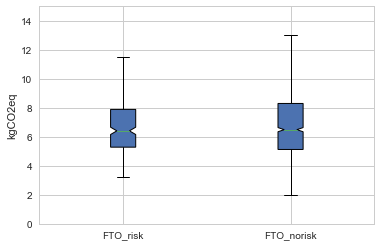

In [67]:
FTO_risk=food4me[(food4me['snp_fto_rs9939609_0m']=='A:A')|(food4me['snp_fto_rs9939609_0m']=='A:T')].copy()
FTO_risk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

FTO_norisk=food4me[(food4me['snp_fto_rs9939609_0m']=='T:T')|(food4me['snp_fto_rs9939609_0m']=='T:A')].copy()
FTO_norisk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

print (FTO_risk.shape,FTO_norisk.shape)

data=[FTO_risk['total_kgCO2'],FTO_norisk['total_kgCO2']]
plt.boxplot(data,patch_artist=True,notch=1)
plt.xticks([1,2],['FTO_risk','FTO_norisk'])
plt.ylim(0,15)
plt.ylabel('kgCO2eq')
print (stats.ttest_ind(FTO_risk['total_kgCO2'],FTO_norisk['total_kgCO2']))


(625, 4096) (830, 4096)
Ttest_indResult(statistic=0.80012397544885083, pvalue=0.42376976547024936)


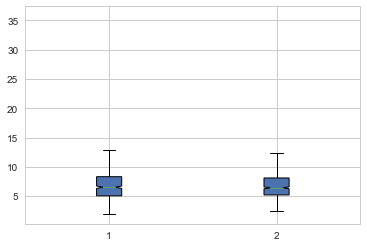

In [68]:
FADS1_risk=food4me[(food4me['snp_fads1_rs174546_0m']=='C:C')].copy()
FADS1_risk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

FADS1_norisk=food4me[(food4me['snp_fads1_rs174546_0m']=='T:T')|(food4me['snp_fads1_rs174546_0m']=='T:C')].copy()
FADS1_norisk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

print (FADS1_risk.shape,FADS1_norisk.shape)

data=[FADS1_risk['total_kgCO2'],FADS1_norisk['total_kgCO2']]
plt.boxplot(data,patch_artist=True,notch=1)
#ax.ylim(0,15)
print (stats.ttest_ind(FADS1_risk['total_kgCO2'],FADS1_norisk['total_kgCO2']))

(736, 4096) (718, 4096)
Ttest_indResult(statistic=0.58749749270849105, pvalue=0.55696098036569419)


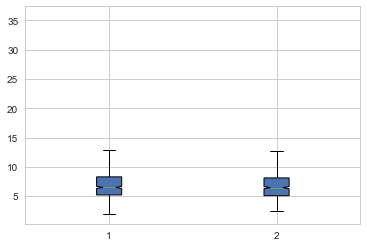

In [69]:
TCF7L2_risk=food4me[(food4me['snp_tcf7l2_rs7903146_0m']=='C:C')].copy()
TCF7L2_risk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

TCF7L2_norisk=food4me[(food4me['snp_tcf7l2_rs7903146_0m']=='T:T')|(food4me['snp_tcf7l2_rs7903146_0m']=='T:C')].copy()
TCF7L2_norisk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

print (TCF7L2_risk.shape,TCF7L2_norisk.shape)

data=[TCF7L2_risk['total_kgCO2'],TCF7L2_norisk['total_kgCO2']]
plt.boxplot(data,patch_artist=True,notch=1)
#ax.ylim(0,15)
print (stats.ttest_ind(TCF7L2_risk['total_kgCO2'],TCF7L2_norisk['total_kgCO2']))

(1076, 4096) (354, 4096)
Ttest_indResult(statistic=-1.119516317295294, pvalue=0.26310819860611256)


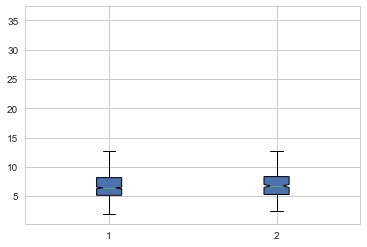

In [70]:
APOE_risk=food4me[(food4me['snp_apoe_e4status01']==0)].copy()
APOE_risk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

APOE_norisk=food4me[(food4me['snp_apoe_e4status01']==1)].copy()
APOE_norisk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

print (APOE_risk.shape,APOE_norisk.shape)

data=[APOE_risk['total_kgCO2'],APOE_norisk['total_kgCO2']]
plt.boxplot(data,patch_artist=True,notch=1)
#ax.ylim(0,15)
print (stats.ttest_ind(APOE_risk['total_kgCO2'],APOE_norisk['total_kgCO2']))

(161, 4096) (992, 4096)
Ttest_indResult(statistic=-1.9649228688809037, pvalue=0.049663396197058653)


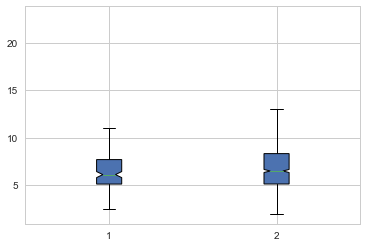

In [71]:
MTHFR_risk=food4me[(food4me['snp_mthfr_rs1801133_0m']=='T:T')|(food4me['snp_mthfr_rs1801133_0m']=='C:T')].copy()
MTHFR_risk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

MTHFR_norisk=food4me[(food4me['snp_mthfr_rs1801133_0m']=='C:C')|(food4me['snp_tcf7l2_rs7903146_0m']=='T:C')].copy()
MTHFR_norisk['total_kgCO2']=avgkgCO2_real['total_kgCO2']

print (MTHFR_risk.shape,MTHFR_norisk.shape)

data=[MTHFR_risk['total_kgCO2'],MTHFR_norisk['total_kgCO2']]
plt.boxplot(data,patch_artist=True,notch=1)
#ax.ylim(0,15)
print (stats.ttest_ind(MTHFR_risk['total_kgCO2'],MTHFR_norisk['total_kgCO2']))

In [72]:
MAR['country']=food4me['country']
MAR['age']=averages['age']
MAR['gender']=averages['gender']

food4me['kgCO2']=avgkgCO2_real['total_kgCO2']

38 729 437 233


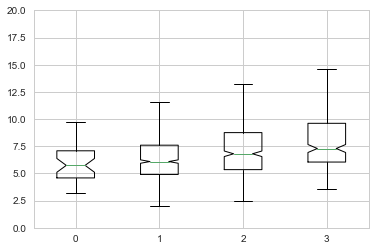

In [73]:
BMIlow=food4me[food4me['anthro_bmi_kgm2_0m']<18.5]['kgCO2']
BMIkcallow=food4me[food4me['anthro_bmi_kgm2_0m']<18.5]['anthro_energyintakereported_kcalday_0m']
BMImid=food4me[(food4me['anthro_bmi_kgm2_0m']>=18.5)&(food4me['anthro_bmi_kgm2_0m']<=24.9)]['kgCO2']
BMIkcalmid=food4me[(food4me['anthro_bmi_kgm2_0m']>=18.5)&(food4me['anthro_bmi_kgm2_0m']<=24.9)]['anthro_energyintakereported_kcalday_0m']
BMIow=food4me[(food4me['anthro_bmi_kgm2_0m']>=25)&(food4me['anthro_bmi_kgm2_0m']<=29.9)]['kgCO2']
BMIkcalow=food4me[(food4me['anthro_bmi_kgm2_0m']>=25)&(food4me['anthro_bmi_kgm2_0m']<=29.9)]['anthro_energyintakereported_kcalday_0m']
BMIobese=food4me[(food4me['anthro_bmi_kgm2_0m']>=30)]['kgCO2']
BMIkcalobese=food4me[(food4me['anthro_bmi_kgm2_0m']>=30)]['anthro_energyintakereported_kcalday_0m']
BMI_kgCO2=[BMIlow,BMImid,BMIow,BMIobese]
BMI_kcal=[BMIkcallow,BMIkcalmid,BMIkcalow,BMIkcalobese]
fig,ax = plt.subplots()
#ax.boxplot(BMI_kgCO2,positions=[0,2,4,6],notch=1)
ax.boxplot(BMI_kgCO2,positions=[0,1,2,3],notch=1)
#ax2 = ax.twinx()
ax2.boxplot(BMI_kcal,positions=[1,3,5,7],notch=1)
ax.set_ylim(0,20)
#ax.set_xlim(-1,8)
#ax2.set_ylim(0,6000)

print (len(BMIlow),len(BMImid),len(BMIow),len(BMIobese))


In [74]:
print (stats.ttest_ind(BMIlow,BMIobese))
print (stats.ttest_ind(BMImid,BMIow))
print (stats.ttest_ind(BMImid,BMIobese))
print (stats.ttest_ind(BMIow,BMIobese))

Ttest_indResult(statistic=-3.611981844775833, pvalue=0.00036247331841437)
Ttest_indResult(statistic=-4.5242291293739401, pvalue=6.682416050656172e-06)
Ttest_indResult(statistic=-7.8259981404300207, pvalue=1.3257818010754877e-14)
Ttest_indResult(statistic=-3.8879542551581689, pvalue=0.0001111890555776879)


In [75]:
gramspergroup=pd.read_excel('\\Users\\Walker\\Documents\\Python\\gramspergroup.xlsx')



In [76]:
gramspergroup['country']=food4me['country']
gramspergroup['gender']=food4me['gender']

In [77]:
country=[0,1,2,3,4,5,6]
cereal=[]
bread=[]
pot=[]
meat=[]
dair=[]
sweets=[]
soups=[]
drinks=[]
fruits=[]
vegetables=[]
eggs=[]
for i in country:
    sub=gramspergroup[(gramspergroup['country'])==i]
    gender=[0,1]
    for k in gender:
        cer=sub[sub['gender']==k]['Cereal'].mean()
        cereal.append(cer)
        bre=sub[sub['gender']==k]['Bread and Savoury Biscuits'].mean()
        bread.append(bre)
        pota=sub[sub['gender']==k]['Potatoes, Rice, and Pasta'].mean()
        pot.append(pota)
        mea=sub[sub['gender']==k]['Meat and Fish'].mean()
        meat.append(mea)
        dai=sub[sub['gender']==k]['Dairy'].mean()
        dair.append(dai)
        swe=sub[sub['gender']==k]['Sweets'].mean()
        sweets.append(swe)
        sou=sub[sub['gender']==k]['Soups, Sauces, and Spreads'].mean()
        soups.append(sou)
        dri=sub[sub['gender']==k]['DRINKS'].mean()
        drinks.append(dri)
        fru=sub[sub['gender']==k]['Fruits'].mean()
        fruits.append(fru)
        veg=sub[sub['gender']==k]['Vegetables'].mean()
        vegetables.append(veg)
        egg=sub[sub['gender']==k]['Eggs'].mean()
        eggs.append(egg)

In [78]:
country=[0,1,2,3,4,5,6]
average_both=[]
average_both_sem=[]
average_both_std=[]
group=['Cereal','Bread and Savoury Biscuits','Potatoes, Rice, and Pasta','Meat and Fish',
                  'Dairy','Sweets','Soups, Sauces, and Spreads','DRINKS','Fruits','Vegetables','Eggs']
for i in country:
    for j in group:
        sub=gramspergroup[(gramspergroup['country'])==i][j].mean()
        sem=gramspergroup[(gramspergroup['country'])==i][j].sem()
        std=gramspergroup[(gramspergroup['country'])==i][j].std()
        average_both.append(sub)
        average_both_sem.append(sem)
        average_both_std.append(std)

In [79]:
average_both=np.reshape(average_both,(7,11))
average_both_df=pd.DataFrame(average_both)

In [80]:
average_both_df.shape

(7, 11)

In [81]:
average_both_sem=np.reshape(average_both_sem,(7,11))
average_both_df_sem=pd.DataFrame(average_both_sem)

In [82]:
average_both_std=np.reshape(average_both_std,(7,11))
average_both_df_std=pd.DataFrame(average_both_std)

In [83]:
x=[cereal,bread,pot,meat,dair,sweets,soups,drinks,fruits,vegetables,eggs]


In [84]:
avggrams=pd.DataFrame(x)
avggrams.columns=['Germany male','Germany fem','Greece male','Greece fem','Ireland male','Ireland fem',
          'Netherlands male','Netherlands fem','Poland male','Poland fem','Spain male','Spain fem','UK male','UK fem']


In [85]:
avggrams=avggrams.transpose()

In [86]:
avggrams.columns=['Cereals','Breads','Potatoes, Rice, Pasta','Meat and Fish',
                  'Dairy','Sweets','Soups and Sauces','Drinks','Fruits','Vegetables','Eggs']

In [87]:
avggrams=avggrams.reindex(["Germany male", "Germany fem", "Netherlands male", "Netherlands fem","Greece male","Greece fem",
                 "UK male","UK fem","Ireland male","Ireland fem","Spain male","Spain fem","Poland male","Poland fem"])

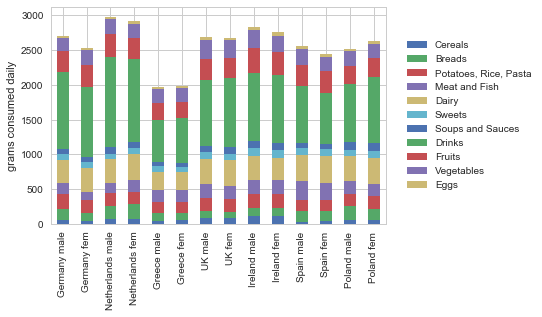

In [88]:
#ax = fig.add_subplot(1, 1, 1)
#handles, labels = ax.get_legend_handles_labels()
labels=['Eggs','Vegetables','Fruits','Drinks','Soups and Sauces','Sweets','Dairy','Meat and Fish','Potatoes, Rice, Pasta',
      'Breads', 'Cereals']
avggrams.plot.bar(stacked=True,label=labels)

plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.25,0.5))
#handles, labels = axis.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), loc='upper left')  

#ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
plt.ylabel('grams consumed daily')
#plt.savefig('gramsconsumed.png',bbox_inches='tight')  

In [89]:
#average_both_df=average_both_df.iloc[[3,2,6,0,4,5,1]]

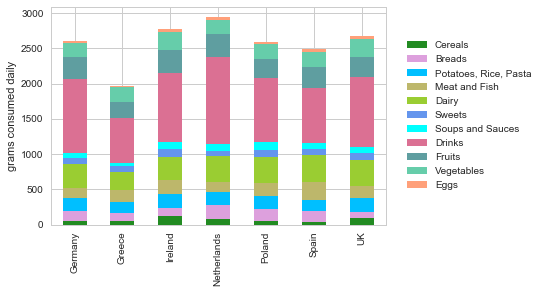

In [90]:
#ax = fig.add_subplot(1, 1, 1)
#handles, labels = ax.get_legend_handles_labels()
labels=['Eggs','Vegetables','Fruits','Drinks','Soups and Sauces','Sweets','Dairy','Meat and Fish','Potatoes, Rice, Pasta',
       'Breads', 'Cereals']
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan','palevioletred','cadetblue','mediumaquamarine','lightsalmon']

average_both_df.plot(kind='bar',stacked=True,label=labels,color=colors)
                         #,yerr=average_both_df_sem)
#plt.patch.set_facecolor('gray')
plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.25,0.5))
#handles, labels = axis.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), loc='upper left')  

#ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
plt.ylabel('grams consumed daily')
plt.xticks([0,1,2,3,4,5,6],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'])
plt.savefig('conf_gramsconsumed_percountry.png',bbox_inches='tight')  

In [91]:
average_both_df.columns=['Cereals','Breads','Potatoes, Rice, Pasta','Meat and Fish',
                  'Dairy','Sweets','Soups and Sauces','Drinks','Fruits','Vegetables','Eggs']
average_both_df

,Cereals,Breads,"Potatoes, Rice, Pasta",Meat and Fish,Dairy,Sweets,Soups and Sauces,Drinks,Fruits,Vegetables,Eggs
0,46.462758,140.487886,193.486537,141.280306,336.042307,85.815475,71.990678,1053.498784,305.416611,206.777834,24.245045
1,50.018421,110.045996,156.917136,166.654734,259.714173,84.212702,47.568237,633.554984,236.453258,205.213310,23.483261
2,117.968606,115.546490,200.577946,194.549533,332.629203,115.369388,99.741358,973.059430,335.257621,251.910194,43.885156
3,72.202548,203.423119,180.283477,154.820158,355.633808,84.081970,91.562704,1240.178239,316.647264,211.634026,29.524379
4,54.741750,172.471624,179.712409,177.959103,368.632928,102.235334,111.844076,915.968821,265.390938,209.056862,31.748608
5,40.039995,145.249549,160.648500,255.435856,380.698170,96.560300,78.997548,775.884923,301.426828,221.699084,36.586688
6,88.253122,91.726903,190.163385,181.566967,368.410427,95.878277,90.683401,985.511167,285.769290,258.321987,41.371191


In [92]:
average_both_df_stackedpercent=average_both_df
x=average_both_df.sum(1)
#print (x)
average_both_df_stackedpercent = average_both_df_stackedpercent.div(x, axis='index')*100
average_both_df_stackedpercent.columns=['Cereals','Breads','Potatoes, Rice, Pasta','Meat and Fish',
                  'Dairy','Sweets','Soups and Sauces','Drinks','Fruits','Vegetables','Eggs']
average_both_df_stackedpercent.head()
average_both_df_stackedpercent.shape

(7, 11)

In [93]:
#print(average_both_df_stackedpercent.sum(1))
average_both_df_stackedpercent['Cereals']=average_both_df_stackedpercent.ix[:,'Cereals':'Potatoes, Rice, Pasta'].sum(1)
average_both_df_stackedpercent['Other']=average_both_df_stackedpercent[['Sweets','Soups and Sauces','Eggs']].sum(1)
average_both_df_stackedpercent.drop(['Breads','Potatoes, Rice, Pasta','Sweets','Soups and Sauces','Eggs'],axis=1,inplace=True,errors='ignore')
print (average_both_df_stackedpercent.sum(1))
average_both_df_stackedpercent.head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
5    100.0
6    100.0
dtype: float64


,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
1,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
2,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741
3,15.507158,5.266007,12.096422,42.183052,10.770346,7.198457,6.978559
4,15.712861,6.871638,14.234237,35.368835,10.247694,8.072434,9.492300


In [94]:
impactsperfoodgroupavg=pd.read_excel('\\Users\\Walker\\Documents\\Python\\impactsperfoodgroup.xlsx')


In [95]:
impactsperfoodgroupavg.head()
impactsperfoodgroupavg.shape

(1457, 12)

In [96]:
impactsperfoodgroupavg['country']=food4me['country']

In [97]:
country=[0,1,2,3,4,5,6]
avg=[]
for i in country:
    sub=impactsperfoodgroupavg[impactsperfoodgroupavg['country']==i]
    for j in sub.columns:
        x=sub[j].mean()
        avg.append(x)

In [98]:
len(avg)

91

In [99]:
avg_sublists = [avg[i:i+13] for i in range(0, len(avg), 13)]

In [100]:
avg_sublists=pd.DataFrame(avg_sublists [:])
avg_sublists.columns=impactsperfoodgroupavg.columns
avg_sublists

,Cereal,Bread and Savoury Biscuits,"Potatoes, Rice, and Pasta",Meat and Fish,Dairy,Fats and Spreads,Sweets,"Soups, Sauces, and Spreads",DRINKS,Fruits,Vegetables,Eggs,country
0,0.145754,0.204156,0.444148,1.821748,0.690863,0.199595,0.442586,0.141701,1.378200,0.139788,0.259164,0.041866,0.0
1,0.177556,0.144202,0.410247,2.027893,0.545934,0.069780,0.376225,0.098884,0.849371,0.119365,0.231048,0.046134,1.0
2,0.424337,0.202940,0.440910,2.084676,0.658444,0.204417,0.645484,0.162078,1.076574,0.148742,0.248149,0.075028,2.0
3,0.227642,0.367472,0.408220,2.039589,0.803834,0.204591,0.379085,0.178296,1.356809,0.138653,0.239048,0.050861,3.0
4,0.181993,0.233190,0.389214,2.034907,0.776610,0.249722,0.478718,0.140927,1.052778,0.113098,0.213070,0.057748,4.0
5,0.092155,0.325043,0.424571,2.998284,0.700257,0.222857,0.492881,0.138343,1.350690,0.132029,0.295951,0.063896,5.0
6,0.310143,0.190008,0.473498,1.657012,0.635951,0.191772,0.552383,0.157876,1.220846,0.136506,0.291204,0.070600,6.0


In [101]:
impactsperfoodgroupavgpercent=avg_sublists.ix[:,:-1]
x=impactsperfoodgroupavgpercent.sum(1)
#print (x)
impactsperfoodgroupavgpercent = impactsperfoodgroupavgpercent.div(x, axis='index')*100
impactsperfoodgroupavgpercent.columns=['Cereals','Breads','Potatoes, Rice, Pasta','Meat and Fish','Fats and Spreads',
                  'Dairy','Sweets','Soups and Sauces','Drinks','Fruits','Vegetables','Eggs']
#print(impactsperfoodgroupavgpercent.sum(1))
impactsperfoodgroupavgpercent.head()

,Cereals,Breads,"Potatoes, Rice, Pasta",Meat and Fish,Fats and Spreads,Dairy,Sweets,Soups and Sauces,Drinks,Fruits,Vegetables,Eggs
0,2.466413,3.454667,7.515745,30.827093,11.690580,3.377481,7.489310,2.397817,23.321502,2.365446,4.385500,0.708445
1,3.483793,2.829357,8.049359,39.788833,10.711641,1.369147,7.381826,1.940172,16.665317,2.342032,4.533333,0.905189
2,6.659627,3.184984,6.919731,32.717338,10.333750,3.208158,10.130358,2.543688,16.895968,2.334389,3.894500,1.177511
3,3.560194,5.747050,6.384321,31.897982,12.571498,3.199689,5.928676,2.788440,21.219697,2.168448,3.738568,0.795437
4,3.073189,3.937699,6.572365,34.361969,13.114037,4.216871,8.083753,2.379738,17.777483,1.909796,3.597956,0.975143


In [102]:
impactsperfoodgroupavgpercent['Cereals']=impactsperfoodgroupavgpercent.ix[:,'Cereals': 'Potatoes, Rice, Pasta'].sum(1)
impactsperfoodgroupavgpercent['Other']=impactsperfoodgroupavgpercent[['Sweets','Soups and Sauces','Eggs','Fats and Spreads']].sum(1)
impactsperfoodgroupavgpercent.drop(['Fats and Spreads','Breads','Potatoes, Rice, Pasta','Sweets','Soups and Sauces','Eggs'],axis=1,inplace=True,errors='ignore')
impactsperfoodgroupavgpercent.head()

    
    

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
1,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
2,16.764341,32.717338,3.208158,16.895968,2.334389,3.894500,24.185306
3,15.691566,31.897982,3.199689,21.219697,2.168448,3.738568,22.084051
4,13.583254,34.361969,4.216871,17.777483,1.909796,3.597956,24.552671


In [103]:
impactsperfoodgroupavgpercent

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
1,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
2,16.764341,32.717338,3.208158,16.895968,2.334389,3.894500,24.185306
3,15.691566,31.897982,3.199689,21.219697,2.168448,3.738568,22.084051
4,13.583254,34.361969,4.216871,17.777483,1.909796,3.597956,24.552671
5,11.631532,41.430164,3.079436,18.663785,1.824375,4.089439,19.281269
6,16.536727,28.143157,3.257107,20.735183,2.318450,4.945887,24.063489


In [104]:
average_both_df_stackedpercent

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
1,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
2,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741
3,15.507158,5.266007,12.096422,42.183052,10.770346,7.198457,6.978559
4,15.712861,6.871638,14.234237,35.368835,10.247694,8.072434,9.492300
5,13.875110,10.245189,15.269292,31.119701,12.089825,8.892052,8.508832
6,13.823411,6.780817,13.758691,36.804994,10.672367,9.647318,8.512403


In [105]:
bargraph=pd.concat([average_both_df_stackedpercent,impactsperfoodgroupavgpercent])

In [106]:
bargraph

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
1,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
2,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741
3,15.507158,5.266007,12.096422,42.183052,10.770346,7.198457,6.978559
4,15.712861,6.871638,14.234237,35.368835,10.247694,8.072434,9.492300
5,13.875110,10.245189,15.269292,31.119701,12.089825,8.892052,8.508832
6,13.823411,6.780817,13.758691,36.804994,10.672367,9.647318,8.512403
0,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
1,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
2,16.764341,32.717338,3.208158,16.895968,2.334389,3.894500,24.185306


In [107]:
bargraph=bargraph.sort_index(axis=0, level=None, ascending=True)

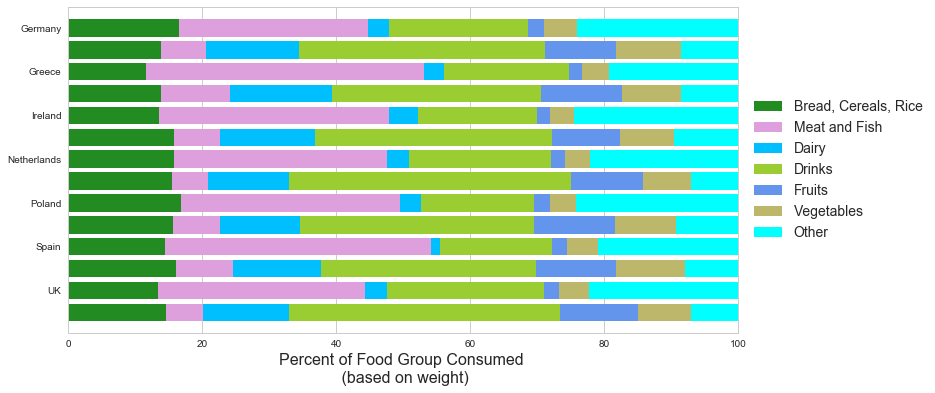

In [108]:
#ax = fig.add_subplot(121,axisbg='gray')
fig = plt.figure(1,figsize=(12, 6)) 
ax=fig.add_subplot(111)

labels=['Other','Vegetables','Fruits','Drinks','Dairy','Meat and Fish','Bread, Cereals, Rice']
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan']#,'palevioletred','cadetblue','mediumaquamarine','lightsalmon']
N=len(bargraph['Cereals'])
ind=np.arange(N)
#ind2=np.arange(N+1)

###plot percentage of food consumed from each food group
ax.barh(ind,bargraph['Cereals'],color='forestgreen')
lefts=bargraph['Cereals']
ax.barh(ind,bargraph['Meat and Fish'],color='plum',left=lefts)
lefts=lefts+bargraph['Meat and Fish']
ax.barh(ind,bargraph['Dairy'],color='deepskyblue',left=lefts)
lefts=lefts+bargraph['Dairy']
ax.barh(ind,bargraph['Drinks'],color='yellowgreen',left=lefts)
lefts=lefts+bargraph['Drinks']
ax.barh(ind,bargraph['Fruits'],color='cornflowerblue',left=lefts)
lefts=lefts+bargraph['Fruits']
ax.barh(ind,bargraph['Vegetables'],color='darkkhaki',left=lefts)
lefts=lefts+bargraph['Vegetables']
ax.barh(ind,bargraph['Other'],color='cyan',left=lefts)

#### plot bars with percentage of impacts from each food group
#ax.barh(ind,bargraph['Cereals'],color='forestgreen')
#lefts2=bargraph['Cereals']
#ax.barh(ind,bargraph['Meat and Fish'],color='plum',left=lefts2)
#lefts2=lefts2+bargraph['Meat and Fish']
#ax.barh(ind,bargraph['Dairy'],color='deepskyblue',left=lefts2)
#lefts2=lefts2+bargraph['Dairy']
#ax.barh(ind,bargraph['Drinks'],color='yellowgreen',left=lefts2)
#lefts2=lefts2+bargraph['Drinks']
#ax.barh(ind,bargraph['Fruits'],color='cornflowerblue',left=lefts2)
#lefts2=lefts2+bargraph['Fruits']
#ax.barh(ind,bargraph['Vegetables'],color='darkkhaki',left=lefts2)
#lefts2=lefts2+bargraph['Vegetables']
#ax.barh(ind,bargraph['Other'],color='cyan',left=lefts2)

plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.15,0.5),fontsize=14)

plt.xlabel('Percent of Food Group Consumed \n (based on weight)',fontsize=16)
plt.yticks([13,11,9,7,5,3,1],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'])

#plt.yticks(np.arange(min(N), max(N)+1, 2.0))
plt.xlim(0,100)
plt.margins(0.04, 0.04) 

#ax2 = ax.twinx()
#ax2.set_yticks([13,11,9,7,5,3,1],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'])
#plt.text(18,12,'Grams',size=16)

plt.savefig('conf_percent_food_types.png',bbox_inches='tight')  

In [109]:
bargraph.head()

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
0,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
1,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
1,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
2,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741


In [110]:
bargraph.reset_index(drop=True)

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
1,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
2,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
3,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
4,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741
5,16.764341,32.717338,3.208158,16.895968,2.334389,3.894500,24.185306
6,15.507158,5.266007,12.096422,42.183052,10.770346,7.198457,6.978559
7,15.691566,31.897982,3.199689,21.219697,2.168448,3.738568,22.084051
8,15.712861,6.871638,14.234237,35.368835,10.247694,8.072434,9.492300
9,13.583254,34.361969,4.216871,17.777483,1.909796,3.597956,24.552671


In [111]:
bargraph

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
0,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
1,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
1,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
2,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741
2,16.764341,32.717338,3.208158,16.895968,2.334389,3.894500,24.185306
3,15.507158,5.266007,12.096422,42.183052,10.770346,7.198457,6.978559
3,15.691566,31.897982,3.199689,21.219697,2.168448,3.738568,22.084051
4,15.712861,6.871638,14.234237,35.368835,10.247694,8.072434,9.492300
4,13.583254,34.361969,4.216871,17.777483,1.909796,3.597956,24.552671


[<Container object of 14 artists>, <Container object of 14 artists>, <Container object of 14 artists>, <Container object of 14 artists>, <Container object of 14 artists>, <Container object of 14 artists>, <Container object of 14 artists>] ['Cereals', 'Meat and Fish', 'Dairy', 'Drinks', 'Fruits', 'Vegetables', 'Other']


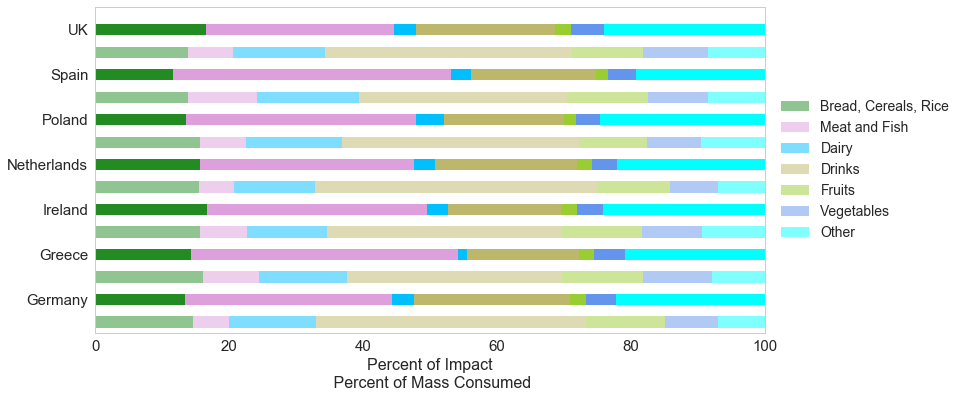

In [128]:
fig = plt.figure(1,figsize=(12, 6)) 
ax=fig.add_subplot(111)

labels=['Other','Vegetables','Fruits','Drinks','Dairy','Meat and Fish','Bread, Cereals, Rice']
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan']    
bargraph.plot(kind='barh', stacked=True, ax=ax,color=colors,width=0.5)
h, l = ax.get_legend_handles_labels()
for handle in h:
    for i, han in enumerate(handle):
        if not i%2:
            han.set_alpha(0.5)
ax.set_xlim(0,100)
plt.xlabel('Percent of Impact\n Percent of Mass Consumed',fontsize=16)
plt.yticks([1,3,5,7,9,11,13,14],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'])
plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.15,0.5),fontsize=14)
plt.margins(0.0, 0.0) 
plt.grid(False)
#plt.savefig('conf_percent_food_types.png',bbox_inches='tight')  
print (h,l)


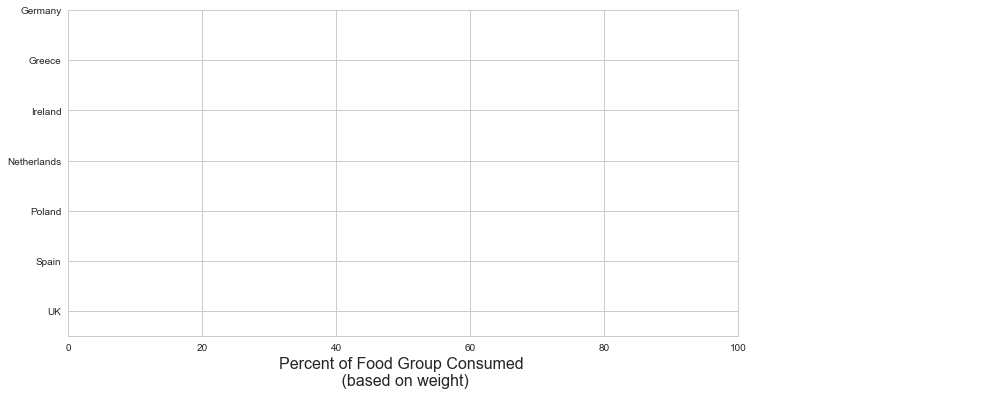

In [113]:
#ax = fig.add_subplot(121,axisbg='gray')
fig = plt.figure(1,figsize=(12, 6)) 
ax=fig.add_subplot(111)

labels=['Other','Vegetables','Fruits','Drinks','Dairy','Meat and Fish','Bread, Cereals, Rice']
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan']#,'palevioletred','cadetblue','mediumaquamarine','lightsalmon']
N=len(bargraph['Cereals'])
ind=np.arange(N)
#ind2=np.arange(N+1)
h, l = ax.get_legend_handles_labels()
for handle in h:
    for i, han in enumerate(handle):
        if not i%2:
            han.set_alpha(0.5)
            ax.barh(ind,bargraph['Cereals'],color='forestgreen',alpha=alpha)
            lefts=bargraph['Cereals']
            ax.barh(ind,bargraph['Meat and Fish'],color='plum',left=lefts,alpha=alpha)
            lefts=lefts+bargraph['Meat and Fish']
            ax.barh(ind,bargraph['Dairy'],color='deepskyblue',left=lefts,alpha=alpha)
            lefts=lefts+bargraph['Dairy']
            ax.barh(ind,bargraph['Drinks'],color='yellowgreen',left=lefts,alpha=alpha)
            lefts=lefts+bargraph['Drinks']
            ax.barh(ind,bargraph['Fruits'],color='cornflowerblue',left=lefts,alpha=alpha)
            lefts=lefts+bargraph['Fruits']
            ax.barh(ind,bargraph['Vegetables'],color='darkkhaki',left=lefts,alpha=alpha)
            lefts=lefts+bargraph['Vegetables']
            ax.barh(ind,bargraph['Other'],color='cyan',left=lefts,alpha=alpha)

#### plot bars with percentage of impacts from each food group
#ax.barh(ind,bargraph['Cereals'],color='forestgreen')
#lefts2=bargraph['Cereals']
#ax.barh(ind,bargraph['Meat and Fish'],color='plum',left=lefts2)
#lefts2=lefts2+bargraph['Meat and Fish']
#ax.barh(ind,bargraph['Dairy'],color='deepskyblue',left=lefts2)
#lefts2=lefts2+bargraph['Dairy']
#ax.barh(ind,bargraph['Drinks'],color='yellowgreen',left=lefts2)
#lefts2=lefts2+bargraph['Drinks']
#ax.barh(ind,bargraph['Fruits'],color='cornflowerblue',left=lefts2)
#lefts2=lefts2+bargraph['Fruits']
#ax.barh(ind,bargraph['Vegetables'],color='darkkhaki',left=lefts2)
#lefts2=lefts2+bargraph['Vegetables']
#ax.barh(ind,bargraph['Other'],color='cyan',left=lefts2)



plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.35,0.5),fontsize=14)

plt.xlabel('Percent of Food Group Consumed \n (based on weight)',fontsize=16)
plt.yticks([13,11,9,7,5,3,1],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'])

#plt.yticks(np.arange(min(N), max(N)+1, 2.0))
plt.xlim(0,100)


plt.savefig('conf_percent_food_types.png',bbox_inches='tight')  

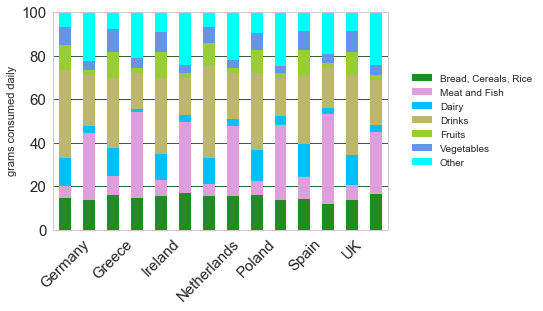

In [126]:
labels=['Other','Vegetables','Fruits','Drinks','Dairy','Meat and Fish','Bread, Cereals, Rice']
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan']

bargraph.plot(kind='bar',stacked=True,label=labels,color=colors,align='center')
                         #,yerr=average_both_df_sem)
#plt.patch.set_facecolor('gray')
plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.25,0.5))
#handles, labels = axis.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), loc='upper left')  

#ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
plt.ylabel('grams consumed daily')
plt.xticks([0,2,4,6,8,10,12],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'],rotation=45)
plt.ylim(0,100)

plt.savefig('conf_gramsconsumed_percountry.png',bbox_inches='tight') 

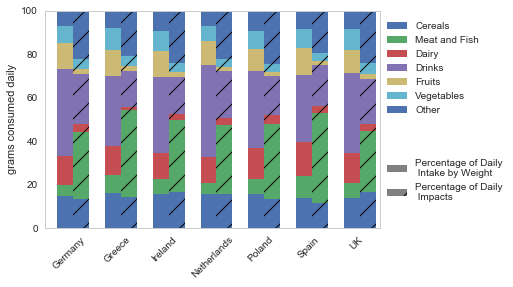

In [115]:
def plot_clustered_stacked(dfall, labels=None, title='',  H="/",a=0.75, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)
    colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan']

    for df in dfall : # for each data frame
        
        axe = df.plot(kind="bar",
                      linewidth=0.1,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part  
                #rect.set_alpha(a * int(i / n_col))
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1=average_both_df_stackedpercent
df2=impactsperfoodgroupavgpercent


# Then, just call :
plot_clustered_stacked([df1, df2],["Percentage of Daily\n Intake by Weight", "Percentage of Daily\n Impacts"])
plt.ylabel('grams consumed daily')
plt.xticks([0,1,2,3,4,5,6],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'],rotation=45)
plt.ylim(0,100)


plt.savefig('conf_gramsconsumedandimpacts_percountry.png',bbox_inches='tight') 

In [116]:
impactsperfoodgroupavgpercent

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,13.436825,30.827093,3.377481,23.321502,2.365446,4.385500,22.286152
1,14.362510,39.788833,1.369147,16.665317,2.342032,4.533333,20.938828
2,16.764341,32.717338,3.208158,16.895968,2.334389,3.894500,24.185306
3,15.691566,31.897982,3.199689,21.219697,2.168448,3.738568,22.084051
4,13.583254,34.361969,4.216871,17.777483,1.909796,3.597956,24.552671
5,11.631532,41.430164,3.079436,18.663785,1.824375,4.089439,19.281269
6,16.536727,28.143157,3.257107,20.735183,2.318450,4.945887,24.063489


In [117]:
average_both_df_stackedpercent

,Cereals,Meat and Fish,Dairy,Drinks,Fruits,Vegetables,Other
0,14.601288,5.422379,12.897400,40.433586,11.721977,7.936193,6.987177
1,16.059162,8.443190,13.157838,32.097647,11.979376,10.396674,7.866114
2,15.612078,6.996939,11.962949,34.995907,12.057480,9.059905,9.314741
3,15.507158,5.266007,12.096422,42.183052,10.770346,7.198457,6.978559
4,15.712861,6.871638,14.234237,35.368835,10.247694,8.072434,9.492300
5,13.875110,10.245189,15.269292,31.119701,12.089825,8.892052,8.508832
6,13.823411,6.780817,13.758691,36.804994,10.672367,9.647318,8.512403


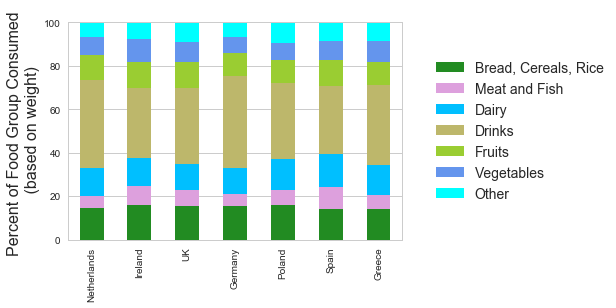

In [118]:


#ax = fig.add_subplot(121,axisbg='gray')
fig = plt.figure(1,figsize=(12, 6)) 
#handles, labels = ax.get_legend_handles_labels()
labels=['Other','Vegetables','Fruits','Drinks','Dairy','Meat and Fish','Bread, Cereals, Rice']
colors=['forestgreen','plum','deepskyblue','darkkhaki','yellowgreen','cornflowerblue','cyan']#,'palevioletred','cadetblue','mediumaquamarine','lightsalmon']

#average_both_df.plot(kind='bar',stacked=True,color='gray')
                         #,yerr=average_both_df_sem)
average_both_df_stackedpercent.plot(kind='bar',stacked=True,color=colors)
#plt.patch.set_facecolor('gray')
plt.legend(labels=labels[::-1],loc='center', bbox_to_anchor=(1.35,0.5),fontsize=14)
#handles, labels = axis.get_legend_handles_labels()
#ax.legend(reversed(handles), reversed(labels), loc='upper left')  

#ax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
plt.ylabel('Percent of Food Group Consumed \n (based on weight)',fontsize=16)
plt.xticks([3,6,1,0,4,5,2],['Germany','Greece','Ireland','Netherlands','Poland','Spain','UK'])
plt.ylim(0,100)
#for i,v in enumerate(average_both_df_stackedpercent['Meat and Fish']):
#    plt.text(v+3,i+0.25,str(v), color='black')


plt.savefig('new_conf_percent_food_types.png',bbox_inches='tight')  

In [119]:
average_both_df_sem.columns=['Cereals','Breads','Potatoes, Rice, Pasta','Meat and Fish',
                  'Dairy','Sweets','Soups and Sauces','Drinks','Fruits','Vegetables','Eggs']
average_both_df_sem

,Cereals,Breads,"Potatoes, Rice, Pasta",Meat and Fish,Dairy,Sweets,Soups and Sauces,Drinks,Fruits,Vegetables,Eggs
0,3.664398,6.571582,5.968124,5.537611,13.774764,4.164349,2.899991,33.078909,13.445048,7.137951,1.357500
1,4.063210,9.669155,5.829580,5.368322,12.785119,4.581461,2.133148,29.250736,12.498626,8.178007,1.847843
2,6.182051,5.543546,5.960512,5.280534,12.102279,6.428589,3.891644,35.456765,20.498659,12.592886,3.741475
3,5.160700,10.298383,5.297130,6.262089,14.419667,4.242387,4.391845,39.004319,12.695669,7.729385,2.295816
4,4.434553,8.595765,6.663175,6.703721,17.656463,5.989931,4.632600,29.310713,13.901382,9.339469,1.649481
5,4.043941,9.763597,6.340338,7.041331,16.269170,5.116444,4.810862,30.499995,14.781228,7.494062,1.649219
6,7.508470,5.935544,7.430419,6.721825,15.301909,5.250437,4.190063,36.084304,17.080142,10.565031,3.631691


In [1]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i,resolution=100) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)



fig = pl.figure(figsize=(6, 6))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:247: UserWarning: The resolution kwarg to Polar plots is now ignored.
If you need to interpolate data points, consider running
cbook.simple_linear_interpolation on the data before passing to matplotlib.
  cbook.simple_linear_interpolation on the data before passing to matplotlib.""")


In [121]:
avggrams.head()

,Cereals,Breads,"Potatoes, Rice, Pasta",Meat and Fish,Dairy,Sweets,Soups and Sauces,Drinks,Fruits,Vegetables,Eggs
Germany male,52.551211,160.408767,213.074877,166.577912,327.020416,84.789454,71.116446,1110.679436,290.141833,199.386695,26.752488
Germany fem,41.369534,123.283489,176.569334,119.892330,343.833940,86.701584,72.745697,1004.115493,318.608465,213.161090,22.102321
Netherlands male,66.936412,198.058163,182.617958,144.192087,340.577589,77.621182,89.894303,1300.037894,331.901586,213.166265,26.155750
Netherlands fem,77.312264,208.788075,177.948997,165.546638,370.690027,90.542758,93.246554,1180.318584,301.392942,210.101788,32.893008
Greece male,48.212889,106.039164,157.230141,170.410126,264.940894,87.577310,48.927170,615.676642,239.986650,202.043429,23.045862


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:247: UserWarning: The resolution kwarg to Polar plots is now ignored.
If you need to interpolate data points, consider running
cbook.simple_linear_interpolation on the data before passing to matplotlib.
  cbook.simple_linear_interpolation on the data before passing to matplotlib.""")


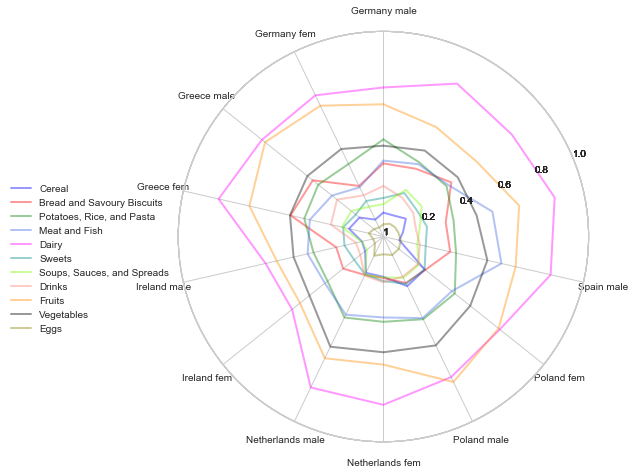

In [122]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = 14
        self.angles = np.arange(90, 90+360, 360.0/14)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i,resolution=100) 
                         for i in range(14)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=10)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1,450,450), angle=angle)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 450)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)


#titles = list("ABCDE")
#titles=['Germany','Greece','Ireland','Netherlands','Poland','UK','Spain']
titles = ['Germany male','Germany fem','Greece male','Greece fem','Ireland male','Ireland fem',
          'Netherlands male','Netherlands fem','Poland male','Poland fem','Spain male','Spain fem','UK male','UK fem']

#labels = [["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000'],
      #    ["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000'],
       #   ["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000'],
        #  ["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000'],
         # ["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000'],
          #["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000'],
          #["1", "10", "50", "100", "200","500","1000"],["1", "10", "50", "100", "200",'500','1000']]

fig = pl.figure(figsize=(6, 6))

#,'bread','pot','meat','dairy','sweets','soups','drinks','fruits','vegetables','eggs']
radar = Radar(fig, titles, labels)
radar.plot(avggrams['Cereals'],  "-", lw=2, color="b", alpha=0.4, label="Cereal")
radar.plot(avggrams['Breads'],"-", lw=2, color="r", alpha=0.4, label="Bread and Savoury Biscuits")
radar.plot(avggrams['Potatoes, Rice, Pasta'], "-", lw=2, color="g", alpha=0.4, label="Potatoes, Rice, and Pasta")
radar.plot(avggrams['Meat and Fish'], "-", lw=2, color='royalblue', alpha=0.4, label="Meat and Fish")
radar.plot(avggrams['Dairy'], "-", lw=2, color="magenta", alpha=0.4, label="Dairy")
radar.plot(avggrams['Sweets'], "-", lw=2, color="darkcyan", alpha=0.4, label="Sweets")
radar.plot(avggrams['Soups and Sauces'], "-", lw=2, color="lawngreen", alpha=0.4, label="Soups, Sauces, and Spreads")
radar.plot(avggrams['Drinks'].div(10), "-", lw=2, color="salmon", alpha=0.4, label="Drinks")
radar.plot(avggrams['Fruits'], "-", lw=2, color="darkorange", alpha=0.4, label="Fruits")
radar.plot(avggrams['Vegetables'], "-", lw=2, color="black", alpha=0.4, label="Vegetables")
radar.plot(avggrams['Eggs'], "-", lw=2, color="olive", alpha=0.4, label="Eggs")

radar.ax.legend(loc='upper right', bbox_to_anchor=(0,0.65))


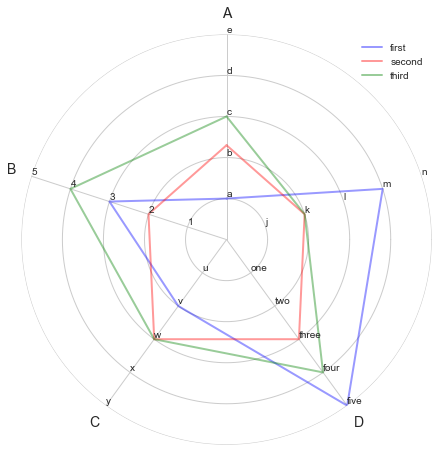

In [123]:
import numpy as np
import pylab as pl

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(90, 90+360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 6), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 5)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)



fig = pl.figure(figsize=(6, 6))

titles = list("ABCDE")

labels = [
    list("abcde"), list("12345"), list("uvwxy"), 
    ["one", "two", "three", "four", "five"],
    list("jklmn")
]

radar = Radar(fig, titles, labels)
radar.plot([1, 3, 2, 5, 4],  "-", lw=2, color="b", alpha=0.4, label="first")
radar.plot([2.3, 2, 3, 3, 2],"-", lw=2, color="r", alpha=0.4, label="second")
radar.plot([3, 4, 3, 4, 2], "-", lw=2, color="g", alpha=0.4, label="third")
radar.ax.legend()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


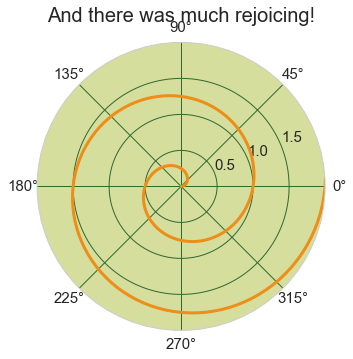

In [124]:
# radar green, solid grid lines
plt.rc('grid', color='#316931', linewidth=1, linestyle='-')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar, IMO

size = min(5, 5)
# make a square figure
fig = pl.figure(figsize=(size, size))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, axisbg='#d5de9c')

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(theta, r, color='#ee8d18', lw=3)
ax.set_rmax(2.0)

ax.set_rgrids(np.arange(0.5, 2.0, 0.5))
ax.grid(True)

ax.set_title("And there was much rejoicing!", fontsize=20)
plt.show() 